# Lending Club Loan
### CUNEF - MS Data Science for Finance
### Machine Learning

__Start Date:__ 15 november 2019

__End Date:__ 15 december 2019

__Authors:__ Jordi Tarroch and José María Álvarez

# TABLE OF CONTENTS
<a id= "init"></a>


- [Executive Smmary](#executivesummary)
    - [Objectives](#objectives)
    - [KPI](#kpi)
    - [Results](#results)
    
- [Data Set](#dataset)
    - [Data Loading](#dataloading)
    - [Target Variable](#targetvariable)
        - [Target Groups](#groupingloanstatus)
        
    - [Data Wrangling](#datawrangling)
        - [Data Wrangling 1](#datawrangling1)
        - [Data Wrangling 2](#datawrangling2)
        - [Data Wrangling 3](#datawrangling3)
        - [Data Wrangling 4](#datawrangling4)
        - [Data Wrangling 5](#datawrangling5)
        - [Data Wrangling 6](#datawrangling6)
        - [Data Wrangling 7](#datawrangling7)
        - [Data Wrangling 8](#datawrangling8)
        - [Generation of dummies](#dummies)
            - [Data Wrangling 9: Ordinal Encoding](#datawrangling9)
            - [Data Wrangling 10](#datawrangling10)
            - [Data Wrangling 11: loan_status, target variable](#datawrangling11)
            - [Data Wrangling 12: Nominal Encoding](#datawrangling12)
            
        - [Scaling](#scaling)
            - [Data Wrangling 13](#datawrangling13)
                   
- [Sampling](#sampling)            
- [Lasso](#lasso)
    - [Final Variables](#finalvars)
    
- [Data Dictionary](#datadictionary)
    - [Predictive Variables](#predictivevariables)
    - [Target Variable](#targetvariables)

- [Exploratory Data Analysis](#eda)
    - [Descriptive Functions](#descriptivefunctions)
    - [Panel Description](#paneldescription)
        - [Categorical variables for the models](#categorical)
        - [Numeric variables for the models](#numeric)
            - [Correlation Matrix](#correlationmatrix)
    
- [Modeling](#modeling)
    - [Train and Test Data Sets](#traintest)
    
    - [Logistic Regression](#logisticregression)
        - [Feature Importance](#featureimportancerandomlogistic)
        
    - [Support Vector machine](#svm)
        - [Kernel](#kernel)
            - [Linear Kernel](#linearkernel)
                - [Feature Importance](#featureimportancerandomSVM)
            - [Polynomial Kernel](#polykernel)
            - [Radial Basis Function Kernel](#rbfkernel)
            - [Sigmoid Kernel](#sigmoidkernel)
               
        - [ Grid Search](#gridsearch)
            - [Grid Search Linnear Kernel](#gridsearchslinearsvm)
                - [Feature Importance after Grid Search](#featureimportancelinear)
            - [Grid Search Poly Kernel](#gridsearchskernelsvm)
            - [Grid Search Radial Basis Function Kernel](#gridsearchsrbfsvm)
            - [Grid Search Sigmoid Kernel](#gridsearchsigmoidsvm)
        
    - [Random Forest](#randomforest)
        - [Feature Importance](#featureimportancerandomforest)
        - [Grid Search Random Forest](#gridsearchrandomforest)
            - [Feature Importance after Grid Search](#featureimportancerandomforesttgrid)
        
    - [XGBoost](#xgboost)
        - [Feature Importance](#featureimportancexgboost)
        - [Grid Search XGBoost](#featureimportancexgboost)
             - [Feature Importance after Grid Search](#featureimportancexgboostgrid)
        
- [Conclusions](#conclusions)

- [References](#references)




In [5]:
############
# LIBRARIES#
############

#dataframes
import pandas as pd

#maths
import numpy as np
#mode
import statistics

#sql
import sqlite3

#scaling
from sklearn.preprocessing import MinMaxScaler

#lasso
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

#visualization
import seaborn as sns
import graphviz
import panel
from matplotlib import pyplot as plt

#seed train-test
import random
from sklearn.model_selection import train_test_split

#Grid search
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

# logisticRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#svm
from sklearn import svm
from sklearn import datasets, metrics, model_selection, svm

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

# Display in jupyter notebookfrom IPython.display import ImageImage(filename = 'tree.png')
import os
import six
import pydot
from sklearn import tree


#xgboost
import xgboost as xgb
from xgboost import XGBClassifier

#performance metrics
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, precision_score, recall_score, accuracy_score
# confusion matrix
from sklearn import metrics

#Measure time
import time

# Executive Summary
<a id= "executivesummary"></a>

Studying loan club data we are going to see the main features and extract the most valuable information of it.
We'll do that by:
- Firstly preprocessing the data.
- Fitting some models with this data.
- Selecting the best model for our study case.


## Objectives:
<a id= "objectives"></a>

The main objective of this project is to find the best model to predict whether the borrower, given some characteristics, will pay the loan in full or at least miss a payment. To do this, a supervised classification model will be estimated using the data from Lending Club Loan Data. The type of models to be compared are Logistic Regression, Support Vector Machine, Random Forest and XGBOOST.

### Question:
<a id= "question"></a>

Is there a model that predicts better than the rest?


## KPI:
<a id= "kpi"></a>

The best model will be the one that outperforms the rest in the following scores: 

__- Precision:__ also called positive predictive value, is the fraction of relevant instances among the retrieved instances.
$$
\text { Precision }=\frac{t p}{t p+f p}
$$
__- Recall:__ also known as sensitivity, is the fraction of the total amount of relevant instances that were actually retrieved. 
$$
\text { Recall }=\frac{t p}{t p+f n}
$$


__- F1-score:__ In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

$$
F_{1}=\left(\frac{2}{\mathrm{recall}^{-1}+\text { precision }^{-1}}\right)=2 \cdot \frac{\text { p } \cdot \text { r }}{\text { p }+\text { r }}
$$

## Results:
<a id= "results"></a>

The best model is SVM Radial Basis Function Kernel with the following scores:


| Model                            | Precision | Recall | f1-score |
|----------------------------------|-----------|--------|----------|
| SVM Radial Basis Function Kernel | 0.77      | 0.81   | 0.75     |



Compared to the other models:


| Model                            | Precision | Recall | f1-score |
|----------------------------------|-----------|--------|----------|
| Logistic Regression              | 0.71      | 0.78   | 0.73     |
| SVM Linear Kernel                | 0.65      | 0.81   | 0.72     |
| SVM Poly Kernel                  | 0.75      | 0.81   | 0.74     |
| SVM Radial Basis Function Kernel | 0.77      | 0.81   | 0.75     |
| SVM Sigmoid Kernel               | 0.65      | 0.8    | 0.72     |
| Random Forest                    | 0.65      | 0.8    | 0.72     |
| XGBOOST                          | 0.7       | 0.78   | 0.73     |




Based on the proposed scores, the best model to predict the test set was the Support Vector Machine with Radial Basis Function Kernel. Looking at the feature importance for the models, every model had different features as the main characteristics to decide the classification, but some interesting conclusions arose from this initial approach.


| Feature Importance | XGBOOST                    | Random Forest              | SVM Linear Kernel          | Logistic Regression        |
|--------------------|----------------------------|----------------------------|----------------------------|----------------------------|
| 1                  | sub_grade                  | sub_grade                  | purpose_small_business     | purpose_debt_consolidation |
| 2                  | total_bc_limit             | revol_util                 | addr_state_DC              | purpose_credit_card        |
| 3                  | tot_cur_bal                | tot_hi_cred_lim            | addr_state_DE              | purpose_car                |
| 4                  | tot_hi_cred_lim            | tot_cur_bal                | purpose_car                | purpose_home_improvement   |
| 5                  | revol_util                 | total_bal_ex_mort          | purpose_wedding            | installment                |
| 6                  | total_bal_ex_mort          | installment                | purpose_other              | purpose_other              |
| 7                  | installment                | total_acc                  | purpose_house              | initial_list_status_f      |
| 8                  | revol_bal                  | total_bc_limit             | purpose_credit_card        | initial_list_status_w      |
| 9                  | total_acc                  | total_il_high_credit_limit | purpose_debt_consolidation | addr_state_NV              |
| 10                 | total_il_high_credit_limit | revol_bal                  | purpose_major_purchase     | addr_state_HI              |



XGBOOST and Random Forest models selected a group of features as the most important; `sub_grade`, `tot_hi_cred_lim`, `total_acc`, `revol_util`, among other. Every feature for these models is related somehow to the rest of the features; happening in both models. On the other hand, the SVM Linear Kernel and the Logistic Regression (both linear) selected a group of features as the most important as well; `purpose` and `addr_state` in different categories. The only variable shared by the groups is `installment`. Apparently, there are two approaches for this classification problem: a linear approach and a non-linear; only by looking at the features each model selects.

# Data Set
<a id= "dataset"></a>

## Data Loading
<a id= "dataloading"></a>

In [6]:
path = "../csv_files/database.sqlite"
conn = sqlite3.connect(path)
df = pd.read_sql_query("select * from loan limit 5;", conn)

In [7]:
# INPUT: df of type pandas.core.frame.DataFrame
# OUTPUT: Column names list

####################
# COLUMN NAMES LIST#
####################
dfColumnNames = list(df.columns)
dfColumnNames

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Target Variable: loan_status
<a id= "targetvariable"></a>

* `loan_status` variable analysis.

In [8]:
# INPUT: sql table loan
# OUTPUT: [unique values of column loan_status] from [sql table loan]

#Read [Column-> loan_status] from [sql_table-> loan]
loan_status_column = pd.read_sql_query("select loan_status from loan;", conn)

# Unique values of--> status
uniqueStatus = loan_status_column['loan_status'].unique()
uniqueStatus

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

#### Percentage of Loan Status types

In [9]:
# INPUT: loan_status_column of [type pandas.core.frame.DataFrame] from [sql table loan]
# OUTPUT: Percentage of Loan Status types

statusGB = loan_status_column.groupby('loan_status')
statusGB["loan_status"].count() / statusGB["loan_status"].count().sum()

loan_status
Charged Off                                            0.115742
Current                                                0.406824
Default                                                0.000014
Does not meet the credit policy. Status:Charged Off    0.000337
Does not meet the credit policy. Status:Fully Paid     0.000879
Fully Paid                                             0.460904
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Late (31-120 days)                                     0.009686
Name: loan_status, dtype: float64

#### Grouping Loan Status values in 2 groups
<a id= "groupingloanstatus"></a>

Our goal is to predict the ones that are going to pay the full loan and the ones who will not pay at least once  during the lifetime of that contract:

__GROUP 1__

We know that these types paid the lone:

__- Fully Paid:__ A ‘fully paid’ loan has been repaid in full including all principal and interest payments.

__- Does not meet the credit policy. Status:Fully Paid__


__GROUP 2__

These ones are already breaking the contract:

__- Charged Off:__ After a loan has been defaulted we take action as described above. Once our actions and those of the debt collection agencies that we work with are completed, the loan is ‘charged off’. From this status everybody knows that no further action is taken on this loan and all dunning, collection and legal measures that are possible have been completed.                                                                                          
__- Default:__ When a loan has one or more payments that are overdue for over 90 days the loan is considered as ‘defaulted’. After a loan has reached this status we decide individually what happens next.                                               
__- Does not meet the credit policy. Status:Charged Off__ 



__- In Grace Period:__ This status indicates that a loan has become due (regardless if it's the first payment or a consecutive payment on the loan). This period lasts 3 days from the time the payment becomes due. If the borrower completes the payment during that time the payment is marked as "Paid on time" and no late interest is charged on the loan.

__- Late (16-30 days):__ When one or more payments of a loan are overdue for more than 16 days, but for less than 31 days. This is the first of the two  late ranges. This also means that we have started to get in touch with the borrower via multiple communication channels to remind them about their payment obligations.                                      
__- Late (31-120 days):__ When one or more payments of a loan are overdue for 31 days or more, but less than 120 days. When a loan is in this status the dunning procedures are ongoing and we regularly get in touch with the borrower by email and over the phone. 


__EXCLUDED VALUE__

We don't know what is going to happen with this type:

__- Current:__ A loan can have the status ‘current’ when one or more payments have been completed and no payments are past due. It also means that this loan still has one or more scheduled future payments.



[Go to Table of Contents](#init)

## Data Wrangling
<a id= "datawrangling"></a>

### Data Wrangling 1:  Filtering of loan_status type: Current
<a id= "datawrangling1"></a>

- Erase Current's loan_status from the database loan to process data faster.

In [6]:
# INPUT: sql table loan 
# OUTPUT: df_no_current new sql table without [loan_status->Current type] because of what we explained before

pd.read_sql_query("select COUNT(loan_status) from loan where loan_status not in('Current');", conn)


COUNT(loan_status)
0             1340973

In [7]:
# INPUT: sql table loan 
# OUTPUT: df_no_current new sql table without [loan_status->Current type] because of what we explained before

pd.read_sql_query("select COUNT(loan_status) from loan;", conn)

COUNT(loan_status)
0             2260668

In [8]:
# INPUT: sql table loan
# OUTPUT: df_no_current new sql table without [loan_status->Current type] because of what we explained before
try:
    pd.read_sql_query("CREATE TABLE IF NOT EXISTS df_no_current as select * from loan where loan_status not in('Current');", conn)
except:
    print("listo")

listo


In [9]:
pd.read_sql_query("select * from df_no_current limit 10;", conn)

id member_id loan_amnt funded_amnt funded_amnt_inv        term int_rate  \
0                  30000       30000           30000   36 months    22.35   
1                  40000       40000           40000   60 months    16.14   
2                  20000       20000           20000   36 months     7.56   
3                   4500        4500            4500   36 months    11.31   
4                   8425        8425            8425   36 months    27.27   
5                  20000       20000           20000   60 months    17.97   
6                   6600        6600            6325   36 months    11.31   
7                   2500        2500            2475   36 months    13.56   
8                   4000        4000            4000   36 months    17.97   
9                   2700        2700            2675   36 months     8.19   

  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     1151.16     D        D5  ...                                  
1      975.71     C        C4  ...                                  
2      622.68     A        A3  ...                                  
3      147.99     B        B3  ...                                  
4      345.18     E        E5  ...                                  
5      507.55     D        D1  ...                                  
6      217.05     B        B3  ...                                  
7       84.92     C        C1  ...                                  
8      144.55     D        D1  ...                                  
9       84.85     A        A4  ...                                  

  hardship_last_payment_amount disbursement_method debt_settlement_flag  \
0                                             Cash                    N   
1                                             Cash                    N   
2                                             Cash                    N   
3                                             Cash                    N   
4                                             Cash                    N   
5                                             Cash                    N   
6                                             Cash                    N   
7                                             Cash                    N   
8                                             Cash                    N   
9                                             Cash                    N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               
5                                                               
6                                                               
7                                                               
8                                                               
9                                                               

  settlement_amount settlement_percentage settlement_term  
0                                                          
1                                                          
2                                                          
3                                                          
4                                                          
5                                                          
6                                                          
7                                                          
8                                                          
9                                                          

[10 rows x 145 columns]

In [10]:
pd.read_sql_query("select count(loan_amnt) from df_no_current;", conn)

count(loan_amnt)
0           1340973

[Go to Table of Contents](#init)

### ### Data Wrangling 2:  Separating Numeric and Categorical Variables names
<a id= "datawrangling2"></a>
#### Numeric Variables names and Categorical Variables names

In [11]:
# ************************************************
# ATTENTION!!!!!  400 seconds of executing time!!*
# ************************************************


# INPUT: column names of the database
# OUTPUT: column names of the numeric variables and the categorical variables

############
# FUNCTIONS#
############

# Function 1:  to convert a lists of lists to a list
    # input: list of lists
    # output: list
flatten = lambda list_of_lists: [item for sublist in list_of_lists for item in sublist]

# Function 2: to see if the variable is numeric or not in the df_no_current
    # input: name of the column of the database
    # output: name of the column of the numeric variable
def check_type(col_to_check):
    try: # numeric variables
        listof_lists = pd.read_sql_query("select " + " " + col_to_check + " " + "from df_no_current;", conn).values.tolist()
        a_list = flatten(listof_lists) #function 1 output
        a_list = [i for i in a_list if i] # remove Nas
        list(map(float,a_list)) # convert numeric strings to float
        return col_to_check
    except: # not numeric variables
        pass

#####################################################
# LIST OF NAMES OF NUMERIC AND CATEGORICAL VARIABLES#
#####################################################

start_time = time.time()

#Numeric variables processing
numericVariablesColumnNamesWithNone = list(map(lambda x: check_type(x), dfColumnNames))
numericVariablesColumnNamesWithoutNone = [i for i in numericVariablesColumnNamesWithNone if i]# remove nas
numericVariablesColumnNames = numericVariablesColumnNamesWithoutNone

#Categorical variables processing
categoricalVariablesColumnNames = list(set(dfColumnNames).difference(numericVariablesColumnNames))

print("--- %s seconds ---" % (time.time() - start_time))

--- 402.3086860179901 seconds ---


### Data Wrangling 3:  Common sense variables erased
<a id= "datawrangling3"></a>

The following variables were erased because they were equivalent to the target variable. Meaning that using a combination of these variables would be equivalent to using the target variable.

In [12]:
# Numeric
if 'out_prncp_inv' in numericVariablesColumnNames: numericVariablesColumnNames.remove('out_prncp_inv')
    

if 'total_pymnt' in numericVariablesColumnNames: numericVariablesColumnNames.remove('total_pymnt')
    

if 'out_prncp' in numericVariablesColumnNames: numericVariablesColumnNames.remove('out_prncp')
    

if 'total_pymnt_inv' in numericVariablesColumnNames: numericVariablesColumnNames.remove('total_pymnt_inv')
    

if 'total_rec_prncp' in numericVariablesColumnNames: numericVariablesColumnNames.remove('total_rec_prncp')

if 'recoveries'in numericVariablesColumnNames: numericVariablesColumnNames.remove('recoveries')
    
   
# Categorical    
if 'hardship_flag' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('hardship_flag')

if 'debt_settlement_flag' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('debt_settlement_flag')


if 'settlement_date' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('settlement_date')

if 'settlement_status' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('settlement_status')

if 'settlement_amount' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('settlement_amount')

if 'settlement_percentage' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('settlement_percentage')

if 'settlement_term' in categoricalVariablesColumnNames: categoricalVariablesColumnNames.remove('settlement_term')





### Data Wrangling 4:  Numerical Variables NA's percentage and Categorical Variables NA's percentage and Unique values percentage
<a id= "datawrangling4"></a>

We need to do the following variables processing based on the type of variable for future processing:

__- Numeric Variables:__ we calculate the percentage of missing values(NAs).

__- Categorical Variables:__ we calculate the percentage of missing values(NAs) and the percentage of unique values.


#### Numeric Variables Na's percentage

In [13]:
# ************************************************
# ATTENTION!!!!!  200 seconds of executing time!!*
# ************************************************

# INPUT: numericVariablesColumnNames
# OUTPUT: numeric variables list and its corresponding percentage of NAs

rowsDB = pd.read_sql_query("select count(id) from df_no_current;", conn)
nrows = rowsDB.iloc[0][0]

############
# FUNCTIONS#
############

# Function 1: to calculate na_percentage in the numeric values
    # input: name of the column of the database
    # output: name of the column of the database with its corresponding percentage of nas
def check_na(col_to_check):
    tempDF = pd.read_sql_query("select" + " " + col_to_check + " " + "from df_no_current where loan_status not in('Current');", conn)
    nas_percentage = sum(tempDF[col_to_check] == '') / nrows
    data = [col_to_check, nas_percentage]
    return data

# Function 2: to calculate [na_percentage] and [unique_values values percentage] in the categorical variables
    # input: name of the column of the database
    # output: name of the column of the database with its corresponding percentage of nas and
            # its corresponding percentage of unique-values
def check_na_unique_values(col_to_check):
    tempDF = pd.read_sql_query("select" + " " + col_to_check + " " + "from df_no_current where loan_status not in('Current');", conn)
    nas_percentage = sum(tempDF[col_to_check] == '') / nrows
    unique_values_percentage = len(tempDF[col_to_check].value_counts())/ nrows
    data = [col_to_check, nas_percentage, unique_values_percentage]
    return data


#################################################################
# NUMERIC VARIABLES LIST AND ITS CORRESPONDING PERCENTAGE OF NAS#
#################################################################
# numeric_variables_without_none = [i for i in numeric_variables if i]

start_time = time.time()

numericVariablesNaPercentage = list(map(lambda x: check_na(x), numericVariablesColumnNames))

print("--- %s seconds ---" % (time.time() - start_time))

--- 196.57840371131897 seconds ---


#### Categorical Variables Na's percentage and Unique values percentage

In [14]:
# ************************************************
# ATTENTION!!!!!  70 seconds of executing time!!*
# ************************************************

# INPUT: categoricalVariablesColumnNames
# OUTPUT: categorical variables list and its corresponding percentage of NAs

#####################################################################################################
# CATEGORICAL VARIABLES LIST AND ITS CORRESPONDING PERCENTAGE OF NAS AND PERCENTAGE OF UNIQUE VALUES#
#####################################################################################################

start_time = time.time()

categoricalVariablesNaPercentageAndUniquePercentage = list(map(lambda x: check_na_unique_values(x), categoricalVariablesColumnNames))

print("--- %s seconds ---" % (time.time() - start_time))


--- 65.96981716156006 seconds ---


In [15]:
categoricalVariablesNaPercentageAndUniquePercentage

[['hardship_reason', 0.9943421679631134, 7.457271697491299e-06],
 ['purpose', 0.0, 1.044018037648782e-05],
 ['zip_code', 7.457271697491299e-07, 0.0007062036297524261],
 ['last_pymnt_d', 0.0018091341138113891, 0.00010141889508588167],
 ['term', 0.0, 1.4914543394982598e-06],
 ['home_ownership', 0.0, 4.474363018494779e-06],
 ['issue_d', 0.0, 0.00010365607659512905],
 ['earliest_cr_line', 2.1626087922724767e-05, 0.000551092378444607],
 ['emp_length', 0.0, 8.948726036989558e-06],
 ['hardship_loan_status', 0.9943421679631134, 4.474363018494779e-06],
 ['last_credit_pull_d', 4.25064486757004e-05, 0.00010514753093462732],
 ['hardship_start_date', 0.9943421679631134, 2.0134633583226507e-05],
 ['verification_status_joint', 0.9800682042069453, 2.9829086789965196e-06],
 ['addr_state', 0.0, 3.8032085657205624e-05],
 ['next_pymnt_d', 0.972135158575154, 7.680989848416038e-05],
 ['debt_settlement_flag_date', 0.9753678858560165, 6.189535508917778e-05],
 ['pymnt_plan', 0.0, 1.4914543394982598e-06],
 ['em

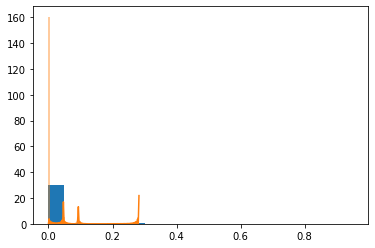

In [16]:
uniquePrecentage = list(map(lambda x : x[2]  ,categoricalVariablesNaPercentageAndUniquePercentage))
bins = np.arange(0, 1, .05)
plt.hist(uniquePrecentage, bins = bins)
sns.distplot(uniquePrecentage)

### Data Wrangling 5:  Filter high NAs percentage  and  high Unique Values percentage of Categorical Variables
<a id= "datawrangling5"></a>


For the variable selection process we are going to filter our data based on the following conditions:

__- Numeric Variables:__ must have a NA's percentage below a threshold to be considered for the modeling process. Working with missing data can produce problems for the modeling process. 

__- Categorical Variables:__ must have a NA's percentage and Unique Values percentage below a threshold to be considered for the modeling process. Working with missing data can produce problems for the modeling process, as well as having lots of unique values. Too many unique values produce the following problems: 
    - They don't add predictive value, as we have lots of differents groups.
    - Dummy generation problems.
    
    
The thresholds selected for NAs and Unique Values are those who ensure that we still keep most of the variables, but at the same time, they give enough information for the future predictions and modeling.

In [17]:
# INPUT: categoricalVariablesNaPercentageAndUniquePercentage
# OUTPUT: categoricalVariables with a filtered percentage of NAs and Unique Values below the thresholds

######################
thresholdNas = 0.98   #
thresholdUnique = 0.0001  #
######################
# True if below threshold
categoricalVariablesNaPercentageAndUniquePercentageFiltered = list(map(lambda x: (x[0],x[1]<thresholdNas and x[2]<thresholdUnique ),categoricalVariablesNaPercentageAndUniquePercentage))
# Return variables with True, below the threshold. 
categoricalVariablesNaPercentageAndUniquePercentageFiltered = list(map(lambda x: x[0], filter(lambda x: x[1] == True, categoricalVariablesNaPercentageAndUniquePercentageFiltered)))

In [18]:
categoricalVariablesNaPercentageAndUniquePercentageFiltered

['purpose',
 'term',
 'home_ownership',
 'emp_length',
 'addr_state',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'pymnt_plan',
 'grade',
 'sub_grade',
 'verification_status',
 'application_type',
 'loan_status',
 'disbursement_method',
 'initial_list_status']

### Data Wrangling 6:  Get the Numeric Variables with the following properties: a) Are highly correlated with another Numeric Variable b) Have a smaller percentage of  NAs than the other highly correlated variable
<a id= "datawrangling6"></a>

Given the __correlation__ of the numeric variables and __the percentage of NAS__, there is the possibility that some variables are explaining mostly the same (highly correlated). The decision is to __keep the variable with less missing values__ from the others that explain the same.

In [19]:
##################################################
# Filter high NAs percentage of Numeric Variables#
##################################################

# INPUT: numericVariablesNaPercentage
# OUTPUT: numericVariables with a percentage of NAs below a threshold

    
###################
thresholdNas = .98#
###################
# True if below threshold
numericVariablesNaPercentageFiltered = list(map(lambda x: (x[0],x[1]<thresholdNas),numericVariablesNaPercentage))
# Return variables with True, below the threshold. 
numericVariablesNaPercentageFiltered = list(map(lambda x: x[0], filter(lambda x: x[1] == True, numericVariablesNaPercentageFiltered)))

In [20]:
# ************************************************
# ATTENTION!!!!!  140 seconds of executing time!!*
# ************************************************

# INPUT: numericVariables with NaPercentage below threshold
# OUTPUT: matrix Correlation (ignoring NAs) of this FILTERED numeric variables based on NA percentage, with format Long

start_time = time.time()



numericVariablesNaPercentageFilteredString = ','.join(numericVariablesNaPercentageFiltered)
matrixData = pd.read_sql_query("select"+ " " + numericVariablesNaPercentageFilteredString+ " " + "from df_no_current;", conn)
matrixDataWithoutWhites= matrixData.replace("", np.nan)
matrixDataWithoutWhitesLong =matrixDataWithoutWhites.astype(float).corr().stack().reset_index()
matrixDataWithoutWhitesLong.columns = ['var_1','var_2','corr']
matrixDataWithoutWhitesLong

print("--- %s seconds ---" % (time.time() - start_time))

--- 348.11077666282654 seconds ---


In [21]:
# INPUT: matrix Correlation of this filtered numeric variables based on NA percentage, with format Long
# OUTPUT: matrix Correlation (ignoring NAs) of this FILTERED numeric variables based on NA percentage, sorted
start_time = time.time()
matrixDataWithoutWhitesLongSorted = matrixDataWithoutWhitesLong.sort_values(by ='corr', ascending = False )
matrixDataWithoutWhitesLongSorted = matrixDataWithoutWhitesLongSorted.loc[matrixDataWithoutWhitesLongSorted['var_1'] !=  matrixDataWithoutWhitesLongSorted['var_2']]
corrs = matrixDataWithoutWhitesLongSorted['corr']
matrixDataWithoutWhitesLongSorted =  matrixDataWithoutWhitesLongSorted[corrs.isin(corrs[corrs.duplicated()])]
matrixDataWithoutWhitesLongSorted = matrixDataWithoutWhitesLongSorted.drop_duplicates(subset= 'corr', keep='first', inplace=False)
matrixDataWithoutWhitesLongSorted
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03677630424499512 seconds ---


In [22]:
# INPUT: matrix numeric variables list and its corresponding percentage of NAs
# OUTPUT: 2 equal dataframes with ALL numeric variables and its corresponding percentage of NAs but with different titles var_1 and var_2 
numericVariablesNaPercentageDataFrameVar1 = pd.DataFrame(numericVariablesNaPercentage) 
numericVariablesNaPercentageDataFrameVar1.columns = ['var_1','NaPercentage1']
numericVariablesNaPercentageDataFrameVar2 = pd.DataFrame(numericVariablesNaPercentage) 
numericVariablesNaPercentageDataFrameVar2.columns = ['var_2','NaPercentage2']

In [23]:
matrixDataWithoutWhitesLongSorted.head()

var_1            var_2      corr
82            funded_amnt        loan_amnt  0.999545
84            funded_amnt  funded_amnt_inv  0.998776
5423             num_sats         open_acc  0.998730
2               loan_amnt  funded_amnt_inv  0.998213
5389  num_rev_tl_bal_gt_0  num_actv_rev_tl  0.981970

In [24]:
# INPUT:
    # all numericVariablesNaPercentageDataFrameVar1, numericVariablesNaPercentageDataFrameVar2
    # matrixDataWithoutWhitesLongSorted, matrix Correlation (ignoring NAs) of this FILTERED numeric variables based on NA percentage, sorted
# OUTPUT: dataframe with:
    # matrix Correlation (ignoring NAs) of this FILTERED numeric variables based on NA percentage, sorted based on correlation
    # Na Percentage of the variables inside the matrix correlation (already FILTERED based on the NA percentage, included in the matrix).
#####################
corrThreshold = 0.75#
#####################

corrMatrixDataNasPercentage = pd.merge(numericVariablesNaPercentageDataFrameVar1, matrixDataWithoutWhitesLongSorted, how='inner', on = 'var_1')
corrMatrixDataNasPercentage = pd.merge(corrMatrixDataNasPercentage, numericVariablesNaPercentageDataFrameVar2,how='inner', on = 'var_2')
corrMatrixDataNasPercentageSortedCorr = corrMatrixDataNasPercentage.sort_values(by ='corr', ascending = False )
corrMatrixDataNasPercentageSortedCorrFiltered = corrMatrixDataNasPercentageSortedCorr[abs(corrMatrixDataNasPercentageSortedCorr['corr'])>corrThreshold]
corrMatrixDataNasPercentageSortedCorrFiltered.head()

var_1  NaPercentage1            var_2      corr  \
1511          funded_amnt       0.000000        loan_amnt  0.999545   
1             funded_amnt       0.000000  funded_amnt_inv  0.998776   
2931             num_sats       0.043692         open_acc  0.998730   
0               loan_amnt       0.000000  funded_amnt_inv  0.998213   
612   num_rev_tl_bal_gt_0       0.052407  num_actv_rev_tl  0.981970   

      NaPercentage2  
1511       0.000000  
1          0.000000  
2931       0.000022  
0          0.000000  
612        0.052407

In [25]:
# INPUT:  dataframe with:
    # matrix Correlation (ignoring NAs) of this FILTERED numeric variables based on NA percentage, sorted based on correlation
    # Na Percentage of the variables inside the matrix correlation (already FILTERED based on the NA percentage, included in the matrix).

# OUTPUT: pandas.core.series.Series with the FINAL FILTER that we wanted:  We get the Numeric 
        # Variables with the following properties:
            # a) Are highly correlated with another Numeric Variable
            # b) Have a smaller percentage of  NAs than the other highly correlated variable

numericVariablesFiltered = corrMatrixDataNasPercentageSortedCorrFiltered.apply(lambda x:x['var_1'] if (x['NaPercentage1'] < x['NaPercentage2']) else x['var_2'], axis = 1)
numericVariablesFilteredList = list(numericVariablesFiltered.unique())

In [26]:
# INPUT: numericVariables Filtered List of names
# OUTPUT: pandas.core.frame.DataFrame with all the filtered Numeric Variables from the sql table loan


# list to string
numericVariablesFilteredString = ','.join(numericVariablesFilteredList)

#Extract Filtered Numeric Variables from table loan 
dfNumericVariablesPd = pd.read_sql_query("select"+ " " + numericVariablesFilteredString+ " " + "from df_no_current;", conn) 

###  Data Wrangling 7: Replace NaN values of the Numeric Variables for the mean
<a id= "datawrangling7"></a>

In [27]:
# INPUT: dfNumericVariablesPd,  all the filtered Numeric Variables from the sql table loan
# OUTPUT: dfNumericVariablesPdNanToMean, Numeric Variables with converted NaNs to Mean.

start_time = time.time()
dfNumericVariablesPdNan = dfNumericVariablesPd.replace("", np.nan)
dfNumericVariablesPdNan = dfNumericVariablesPdNan.astype(float)
dfNumericVariablesPdNanToMean = dfNumericVariablesPdNan

for column in range(0,len(dfNumericVariablesPdNan.columns)):
    dfNumericVariablesPdNanToMean[dfNumericVariablesPdNan.columns[column]] = pd.DataFrame(dfNumericVariablesPdNan[dfNumericVariablesPdNan.columns[column]].replace(np.nan, dfNumericVariablesPdNan[dfNumericVariablesPdNan.columns[column]].mean(skipna = True)))
    
print("--- %s seconds ---" % (time.time() - start_time))  

--- 10.966490030288696 seconds ---


In [206]:
dfNumericVariablesPdNanToMean.to_csv('../csv_files/dfNumericVariablesPdNanToMeanFile.csv')

###  Data Wrangling 8: Replace NaN values of the Categorical Variables for the mode
<a id= "datawrangling8"></a>

In [29]:
# INPUT: categoricalVariablesNaPercentageAndUniquePercentageFiltered, categoricalVariables with a filtered percentage of NAs and Unique Values below the thresholds
# OUTPUT: categoricalDataframeNan, " " spaces converted to NaN
start_time = time.time()


categoricalVariablesNaPercentageFilteredString = ','.join(categoricalVariablesNaPercentageAndUniquePercentageFiltered)
categoricalDataframe = pd.read_sql_query("select"+ " " + categoricalVariablesNaPercentageFilteredString+ " " + "from df_no_current;", conn)
categoricalDataframeNan= categoricalDataframe.replace("", np.nan)

print("--- %s seconds ---" % (time.time() - start_time))

--- 13.179017066955566 seconds ---


In [30]:
# INPUT: categoricalDataframeNan, " " spaces converted to NaN
# OUTPUT: categoricalDataframeNanToMode dataframe, categoricalVariables with the NaN values replaced by the mode.
start_time = time.time()

categoricalDataframeNanToMode = categoricalDataframeNan
for column in range(0,len(categoricalDataframeNan.columns)):
    columnName= 0
    columnName = categoricalDataframeNan.columns[column]
    a = pd.DataFrame(list(categoricalDataframeNan[columnName]))
    a = a.dropna()
    a.columns = ["var"]
    mode = statistics.mode(list(a["var"]))
    categoricalDataframeNanToMode[columnName] = pd.DataFrame(categoricalDataframeNan[columnName].replace(np.nan, mode))
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 15.022922992706299 seconds ---


In [31]:
start_time = time.time()
categoricalDataframeNanToMode.to_csv('../csv_files/categoricalDataframeNanToModeFile.csv')
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 7.122941970825195 seconds ---


[Go to Table of Contents](#init)

## Creation of dummy variables
<a id= "dummies"></a>

###  Data Wrangling 9: Ordinal Encoding
<a id= "datawrangling9"></a>

In [32]:
categoricalDataframeNanToMode.head()

purpose        term home_ownership emp_length addr_state  \
0  debt_consolidation   36 months       MORTGAGE    5 years         CA   
1         credit_card   60 months       MORTGAGE   < 1 year         OH   
2         credit_card   36 months       MORTGAGE  10+ years         WA   
3         credit_card   36 months           RENT  10+ years         TX   
4         credit_card   36 months       MORTGAGE    3 years         MA   

  next_pymnt_d debt_settlement_flag_date pymnt_plan grade sub_grade  \
0     Mar-2019                  Feb-2019          n     D        D5   
1     Mar-2019                  Feb-2019          n     C        C4   
2     Mar-2019                  Feb-2019          n     A        A3   
3     Mar-2019                  Feb-2019          n     B        B3   
4     Mar-2019                  Feb-2019          n     E        E5   

  verification_status application_type loan_status disbursement_method  \
0     Source Verified        Joint App  Fully Paid                Cash   
1            Verified        Joint App  Fully Paid                Cash   
2        Not Verified        Joint App  Fully Paid                Cash   
3        Not Verified       Individual  Fully Paid                Cash   
4            Verified        Joint App  Fully Paid                Cash   

  initial_list_status  
0                   w  
1                   w  
2                   w  
3                   w  
4                   w

In [33]:
# INPUT: categoricalDataframeNanToMode, categorical variables without NaNs
# OUTPUT: categoricalDataframeNanToMode with 'grade' column ordinal encoded

# Create features
df = pd.DataFrame({'Grade': ['A', 
                             'B', 
                             'C', 
                             'D', 
                             'E',
                             'F',
                             'G']})
# Create mapper
scale_mapper = {'A':1,
                'B':2,
                'C':3,
                'D':4,
                'E':5,
                'F':6,
                'G':7}

# Map feature values to scale
categoricalDataframeNanToMode['grade'] = categoricalDataframeNanToMode['grade'].replace(scale_mapper)


In [34]:
# INPUT: categoricalDataframeNanToMode, categorical variables without NaNs
# OUTPUT: categoricalDataframeNanToMode with 'emp_length' column ordinal encoded

# Create features
df = pd.DataFrame({'emp_length': ['n/a', 
                             '< 1 year',
                             '1 year'
                             '2 years', 
                             '3 years', 
                             '4 years',
                             '5 years',
                             '6 years', 
                             '7 years',
                             '8 years',
                             '9 years',
                             '10+ years'
                            ]})
# Create mapper
scale_mapper = {'n/a': 1, 
                '< 1 year': 2, 
                 '1 year': 3,
                 '2 years': 4, 
                 '3 years': 5,
                 '4 years': 6,
                 '5 years': 7,
                 '6 years': 8, 
                 '7 years': 9,
                 '8 years': 10,
                 '9 years': 11,
                 '10+ years': 12
                 }

# Map feature values to scale
categoricalDataframeNanToMode['emp_length'] = categoricalDataframeNanToMode['emp_length'].replace(scale_mapper)

In [35]:
# INPUT: categoricalDataframeNanToMode, categorical variables without NaNs
# OUTPUT: categoricalDataframeNanToMode with 'term' column ordinal encoded

# Create features
df = pd.DataFrame({'term': [' 36 months', 
                             ' 60 months' 
                            ]})
# Create mapper
scale_mapper = {' 36 months': 1, 
                ' 60 months': 2
                 }

# Map feature values to scale
categoricalDataframeNanToMode['term'] = categoricalDataframeNanToMode['term'].replace(scale_mapper)

In [36]:
# INPUT: categoricalDataframeNanToMode, categorical variables without NaNs
# OUTPUT: categoricalDataframeNanToMode with 'sub_grade' column ordinal encoded

# Create features
df = pd.DataFrame({'sub_grade': ['A1',
                                 'A2', 
                                 'A3', 
                                 'A4', 
                                 'A5',
                                 'B1', 
                                 'B2', 
                                 'B3', 
                                 'B4', 
                                 'B5',
                                 'C1', 
                                 'C2', 
                                 'C3', 
                                 'C4', 
                                 'C5',
                                 'D1', 
                                 'D2', 
                                 'D3', 
                                 'D4', 
                                 'D5',
                                 'E1', 
                                 'E2', 
                                 'E3', 
                                 'E4', 
                                 'E5',
                                 'F1', 
                                 'F2', 
                                 'F3', 
                                 'F4', 
                                 'F5',
                                 'G1', 
                                 'G2', 
                                 'G3', 
                                 'G4', 
                                 'G5'                        
                             ]})
                
                
# Create mapper
scale_mapper = {'A1': 1, 
                 'A2': 2, 
                 'A3': 3, 
                 'A4': 4, 
                 'A5': 5,
                 'B1': 6, 
                 'B2': 7, 
                 'B3': 8, 
                 'B4': 9, 
                 'B5': 10,
                 'C1': 11, 
                 'C2': 12, 
                 'C3': 13, 
                 'C4': 14, 
                 'C5': 16,
                 'D1': 17, 
                 'D2': 18, 
                 'D3': 19, 
                 'D4': 20, 
                 'D5': 21,
                 'E1': 22, 
                 'E2': 23, 
                 'E3': 24, 
                 'E4': 25, 
                 'E5': 26,
                 'F1': 27, 
                 'F2': 28, 
                 'F3': 29, 
                 'F4': 30, 
                 'F5': 31,
                 'G1': 32, 
                 'G2': 33, 
                 'G3': 34, 
                 'G4': 35, 
                 'G5': 36 }

# Map feature values to scale
categoricalDataframeNanToMode['sub_grade'] = categoricalDataframeNanToMode['sub_grade'].replace(scale_mapper)

ordinalEncodedVariables = pd.concat([categoricalDataframeNanToMode['sub_grade'],categoricalDataframeNanToMode['grade'], categoricalDataframeNanToMode['term'], categoricalDataframeNanToMode['emp_length']], axis=1, sort=False)

In [37]:
del categoricalDataframeNanToMode['sub_grade']
del categoricalDataframeNanToMode['grade']
del categoricalDataframeNanToMode['term']
del categoricalDataframeNanToMode['emp_length']

[Go to Table of Contents](#init)

###  Data Wrangling 10: delete date variables
<a id= "datawrangling10"></a>

In [42]:
del categoricalDataframeNanToMode['next_pymnt_d']
del categoricalDataframeNanToMode['debt_settlement_flag_date']

[Go to Table of Contents](#init)

###  Data Wrangling 11: loan_status, target variable
<a id= "datawrangling11"></a>

In [44]:
categoricalDataframeNanToMode['loan_status']

0               Fully Paid
1               Fully Paid
2               Fully Paid
3               Fully Paid
4               Fully Paid
                ...       
1340968        Charged Off
1340969         Fully Paid
1340970         Fully Paid
1340971    In Grace Period
1340972         Fully Paid
Name: loan_status, Length: 1340973, dtype: object

In [45]:
# INPUT: categoricalDataframeNanToMode, categorical variables without NaNs.
# OUTPUT: categoricalDataframeNanToMode with 'loan_status' column encoded.


categoricalDataframeNanToMode['loan_status']= list(map(lambda x: 1 if (x == 'Fully Paid' or x == 'Does not meet the credit policy. Status:Fully Paid') else 0 , categoricalDataframeNanToMode['loan_status']))


In [46]:
categoricalDataframeNanToMode['loan_status']

0          1
1          1
2          1
3          1
4          1
          ..
1340968    0
1340969    1
1340970    1
1340971    0
1340972    1
Name: loan_status, Length: 1340973, dtype: int64

In [48]:
numericaAndCategoricalVariablesDataframe["loan_status"].head(5)

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

###  Data Wrangling 12: Nominal Encoding
<a id= "datawrangling12"></a>

In [47]:
# INPUT: categoricalDataframeNanToMode, categorical variables without NaNs
# OUTPUT: numericaAndCategoricalVariablesDataframe encoding with get_dummies the variables that weren't encoded before.
    

nominalEncodedVariables = pd.get_dummies(categoricalDataframeNanToMode)
numericaAndCategoricalVariablesDataframe = pd.concat([dfNumericVariablesPdNanToMean, ordinalEncodedVariables, nominalEncodedVariables], axis=1, sort=False)
numericaAndCategoricalVariablesDataframe.head()

loan_amnt  funded_amnt_inv  open_acc  num_actv_rev_tl  tot_hi_cred_lim  \
0    30000.0          30000.0      11.0              4.0         527120.0   
1    40000.0          40000.0      18.0              9.0         344802.0   
2    20000.0          20000.0       9.0              5.0         622183.0   
3     4500.0           4500.0      12.0              5.0          53795.0   
4     8425.0           8425.0      21.0              8.0         768304.0   

   total_il_high_credit_limit  funded_amnt  installment  total_bal_ex_mort  \
0                    101984.0      30000.0      1151.16            98453.0   
1                    167965.0      40000.0       975.71           161720.0   
2                     74833.0      20000.0       622.68            71569.0   
3                     24595.0       4500.0       147.99            29137.0   
4                    189054.0       8425.0       345.18           189194.0   

   mths_since_recent_revol_delinq  ...  pymnt_plan_y  \
0                       35.792742  ...             0   
1                       35.792742  ...             0   
2                       48.000000  ...             0   
3                       35.792742  ...             0   
4                       35.792742  ...             0   

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    1   
1                                 0                                    0   
2                                 1                                    0   
3                                 1                                    0   
4                                 0                                    0   

   verification_status_Verified  application_type_Individual  \
0                             0                            0   
1                             1                            0   
2                             0                            0   
3                             0                            1   
4                             1                            0   

   application_type_Joint App  disbursement_method_Cash  \
0                           1                         1   
1                           1                         1   
2                           1                         1   
3                           0                         1   
4                           1                         1   

   disbursement_method_DirectPay  initial_list_status_f  initial_list_status_w  
0                              0                      0                      1  
1                              0                      0                      1  
2                              0                      0                      1  
3                              0                      0                      1  
4                              0                      0                      1  

[5 rows x 115 columns]

In [49]:
numericaAndCategoricalVariablesDataframe.to_csv('../csv_files/numericaAndCategoricalVariablesDataframeFile2.csv')

In [50]:
numericaAndCategoricalVariablesDataframe = pd.read_csv('../csv_files/numericaAndCategoricalVariablesDataframeFile2.csv')
del numericaAndCategoricalVariablesDataframe['Unnamed: 0']

[Go to Table of Contents](#init)

## Scaling
<a id= "scaling"></a>

###  Data Wrangling FINAL 13: scaling variables to prepare them ready for the Lasso
<a id= "datawrangling13"></a>

In [51]:
# INPUT: numericaAndCategoricalVariablesDataframe
# OUTPUT: lassoVars,data of all the variables scaled by MinMaxScaler to prepare data for the Lasso

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numericaAndCategoricalVariablesDataframe), columns=numericaAndCategoricalVariablesDataframe.columns)
df_scaled.head()

loan_amnt  funded_amnt_inv  open_acc  num_actv_rev_tl  tot_hi_cred_lim  \
0   0.746835         0.750000  0.122222         0.063492         0.052712   
1   1.000000         1.000000  0.200000         0.142857         0.034480   
2   0.493671         0.500000  0.100000         0.079365         0.062218   
3   0.101266         0.112500  0.133333         0.079365         0.005380   
4   0.200633         0.210625  0.233333         0.126984         0.076830   

   total_il_high_credit_limit  funded_amnt  installment  total_bal_ex_mort  \
0                    0.048520     0.746835     0.668395           0.028888   
1                    0.079911     1.000000     0.566085           0.047452   
2                    0.035602     0.493671     0.360225           0.021000   
3                    0.011701     0.101266     0.083422           0.008549   
4                    0.089944     0.200633     0.198408           0.055513   

   mths_since_recent_revol_delinq  ...  pymnt_plan_y  \
0                        0.177192  ...           0.0   
1                        0.177192  ...           0.0   
2                        0.237624  ...           0.0   
3                        0.177192  ...           0.0   
4                        0.177192  ...           0.0   

   verification_status_Not Verified  verification_status_Source Verified  \
0                               0.0                                  1.0   
1                               0.0                                  0.0   
2                               1.0                                  0.0   
3                               1.0                                  0.0   
4                               0.0                                  0.0   

   verification_status_Verified  application_type_Individual  \
0                           0.0                          0.0   
1                           1.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          1.0   
4                           1.0                          0.0   

   application_type_Joint App  disbursement_method_Cash  \
0                         1.0                       1.0   
1                         1.0                       1.0   
2                         1.0                       1.0   
3                         0.0                       1.0   
4                         1.0                       1.0   

   disbursement_method_DirectPay  initial_list_status_f  initial_list_status_w  
0                            0.0                    0.0                    1.0  
1                            0.0                    0.0                    1.0  
2                            0.0                    0.0                    1.0  
3                            0.0                    0.0                    1.0  
4                            0.0                    0.0                    1.0  

[5 rows x 115 columns]

In [52]:
lassoVars = df_scaled
lassoVars.to_csv('../csv_files/lassoVarsFile2.csv')

In [53]:
lassoVars = pd.read_csv('../csv_files/lassoVarsFile2.csv')
del lassoVars['Unnamed: 0']

# Sampling
<a id= "sampling"></a>


In [54]:
# INPUT: numericaAndCategoricalVariablesDataframe
# OUTPUT: numericaAndCategoricalVariablesDataframe scaled by MinMaxScaler to prepare data for the Lasso

completeTarget = lassoVars.groupby('loan_status')
completeTarget["loan_status"].count() / completeTarget["loan_status"].count().sum()

loan_status
0.0    0.221506
1.0    0.778494
Name: loan_status, dtype: float64

In [55]:
random.seed( 30 )
lassoVars = lassoVars.sample(1000)

In [56]:
sampleTarget = lassoVars.groupby('loan_status')
sampleTarget["loan_status"].count() / sampleTarget["loan_status"].count().sum()

loan_status
0.0    0.233
1.0    0.767
Name: loan_status, dtype: float64

[Go to Table of Contents](#init)

# Lasso
<a id= "lasso"></a>


What LASSO does well is to provide a principled way to reduce the number of features in a model. LASSO involves a penalty factor that determines how many features are retained; using cross-validation to choose the penalty factor helps assure that the model will generalize well to future data samples.

If you need to cut down on the number of predictors for practical reasons, LASSO is a good choice. But all it does is give you a useful set of selected predictors, not necessarily the most important in some general sense.

When features are correlated, LASSO will choose one or the other based on its performance in the particular data sample at hand.
With a different sample it could well choose a different feature from a set of correlated features.

This is why we are interested in using Lasso for the complete data set.

In [57]:
lassoVars.to_csv('../csv_files/lassoVarsFile.csv')
lassoVars = pd.read_csv('../csv_files/lassoVarsFile.csv')
del lassoVars['Unnamed: 0']


In [58]:
# INPUT: lassoVars, variables scaled and prepared for the Lasso
# OUTPUT: 
    # predictiveVariables and loanStatusColumn to fit the linear model minimizing the cost function
    # for graphical purpose and see how Lasso selects the variables.

predictiveVariables = lassoVars.loc[:, lassoVars.columns != 'loan_status']
loanStatusColumn = lassoVars['loan_status']

In [59]:
loanStatusColumn.to_csv('../csv_files/loanStatusColumnFile.csv')
loanStatusColumn = pd.read_csv('../csv_files/loanStatusColumnFile.csv', header= None)
loanStatusColumn = loanStatusColumn.iloc[:,1:]
loanStatusColumn = loanStatusColumn[1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [201]:
cs

array([3.74531835e-03, 1.09687062e-02, 3.21234419e-02, 9.40781435e-02,
       2.75521444e-01, 8.06904378e-01, 2.36313612e+00, 6.92078576e+00,
       2.02685216e+01, 5.93592956e+01, 1.73842278e+02, 5.09122244e+02,
       1.49103809e+03, 4.36672060e+03, 1.27885726e+04, 3.74531835e+04])

In [60]:
# INPUT: predictiveVariables and loanStatusColumn, variables scaled and prepared for the Lasso
# OUTPUT: 
    # predictiveVariables and loanStatusColumn to calculate 'cs',the array of penalties for the Lasso method
    # depending on the variables selected.

start_time = time.time()

cs = l1_min_c(predictiveVariables, loanStatusColumn, loss='log') * np.logspace(0, 7, 16)

#We use the Logistic Regression to apply the penalties from the Lasso.
clf = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.04149603843688965 seconds ---


In [61]:
# ************************************************
# ATTENTION!!!!!  700 seconds of executing time!!*
# ************************************************
# INPUT: predictiveVariables and loanStatusColumn, variables scaled and prepared for the Lasso
# OUTPUT: fit the linear model to minimize the error function
        # for graphical purpose and see how Lasso selects the variables.
    
start_time = time.time()

coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X = predictiveVariables, y = loanStatusColumn)
    coefs_.append(clf.coef_.ravel().copy())
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 534.3729860782623 seconds ---


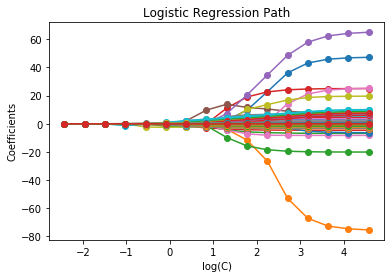

In [62]:
coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax  = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

In [63]:
# INPUT: predictiveVariables and clf, the linear_model.LogisticRegression
# OUTPUT: lassoVariablesFilter, it has all the variables with its corresponding coefficient given by the Lasso.
    # If the coefficient == o, it means it shouldn't be included in the model.
    
start_time = time.time()
lassoVariablesFilter = []
for coefs in range(0,clf.coef_.size):
    lassoVariablesFilter.append((predictiveVariables.columns[coefs], clf.coef_[0][coefs]))
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00039005279541015625 seconds ---


In [66]:
# INPUT:
    # lassoVariablesFilter, , it has all the variables with its corresponding coefficient given by the Lasso.
    # lassoVars,data of all the variables scaled by MinMaxScaler to prepare data for the Lasso
    # numericaAndCategoricalVariablesDataframe, dataframe with all variables.
    
# OUTPUT: lassoVariablesSelectedDataFrame, data frame with the data of the variables selected by the Lasso and scaled.
        # lassoVariablesSelectedNonScaledDataFrame, , data frame with the data of the variables selected by the Lasso.
start_time = time.time()
out_tup = [i for i in lassoVariablesFilter if i[1] == 0]
lassoVariablesSelected = [i for i in lassoVariablesFilter if i[1] != 0]

lassoVariablesSelectedDataFrame = lassoVars[list(map(lambda x: x[0] , lassoVariablesSelected))]
lassoVariablesSelectedNonScaledDataFrame = numericaAndCategoricalVariablesDataframe[list(map(lambda x: x[0] , lassoVariablesSelected))]
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.9067838191986084 seconds ---


In [67]:
# ************************************************
# ATTENTION!!!!!  100 seconds of executing time!!*
# ************************************************

start_time = time.time()
lassoVariablesSelectedDataFrame.to_csv('csv_files/lassoVariablesSelectedDataFrameFile2.csv')
lassoVariablesSelectedNonScaledDataFrame.to_csv('../csv_files/lassoVariablesSelectedNonScaledDataFrameFile2.csv')
print("--- %s seconds ---" % (time.time() - start_time))

--- 126.57435703277588 seconds ---


[Go to Table of Contents](#init)

## Final Variables
<a id= "finalvars"></a>

In [68]:
start_time = time.time()
lassoVariablesSelectedDataFrame = pd.read_csv('../csv_files/lassoVariablesSelectedDataFrameFile2.csv')
del lassoVariablesSelectedDataFrame['Unnamed: 0']
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03129291534423828 seconds ---


In [69]:
start_time = time.time()
lassoVariablesSelectedNonScaledDataFrame = pd.read_csv('../csv_files/lassoVariablesSelectedDataFrameFile2.csv')
del lassoVariablesSelectedNonScaledDataFrame['Unnamed: 0']
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.1265730857849121 seconds ---


In [70]:
list(lassoVariablesSelectedDataFrame.columns)

['loan_amnt',
 'funded_amnt_inv',
 'open_acc',
 'num_actv_rev_tl',
 'tot_hi_cred_lim',
 'total_il_high_credit_limit',
 'funded_amnt',
 'installment',
 'total_bal_ex_mort',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq',
 'revol_util',
 'percent_bc_gt_75',
 'acc_open_past_24mths',
 'num_bc_tl',
 'num_tl_op_past_12m',
 'total_bc_limit',
 'tot_cur_bal',
 'num_sats',
 'num_bc_sats',
 'revol_bal',
 'num_actv_bc_tl',
 'num_rev_tl_bal_gt_0',
 'num_op_rev_tl',
 'acc_now_delinq',
 'open_rv_24m',
 'total_acc',
 'open_il_12m',
 'sub_grade',
 'grade',
 'term',
 'emp_length',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'add

In [71]:
lassoVariablesSelectedDataFrameColumnsDf = pd.DataFrame(list(lassoVariablesSelectedDataFrame.columns), columns=["colummn"])
lassoVariablesSelectedDataFrameColumnsDf.to_csv('../csv_files/lassoVariablesSelectedDataFramecolumnsFile.csv', index=False)

[Go to Table of Contents](#init)

# Data Dictionary
<a id= "datadictionary"></a>


In [205]:
start_time = time.time()
lassoVariablesSelectedDataFrameColumnsDf = pd.read_csv('../csv_files/lassoVariablesSelectedDataFramecolumnsFile.csv')

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.010735034942626953 seconds ---


## Predictive Variables
<a id= "predictivevariables"></a>

| Variable                            | Definition                                                                                                                        |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| loan_amnt                           | The listed amount of the loan applied for by the borrower.                                                                        |
| funded_amnt_inv                     | The total amount committed by investors for that loan at that point in time.                                                      |
| open_acc                            | The number of open credit lines in the borrower's credit file.                                                                    |
| num_actv_rev_tl                     | Number of currently active revolving trades                                                                                       |
| tot_hi_cred_lim                     | Total high credit/credit limit                                                                                                    |
| total_il_high_credit_limit          | Total installment high credit/credit limit                                                                                        |
| funded_amnt                         | The total amount committed to that loan at that point in time.                                                                    |
| installment                         | The monthly payment owed by the borrower if the loan originates.                                                                  |
| total_bal_ex_mort                   | Total high credit/credit limit                                                                                                    |
| mths_since_recent_revol_delinq      | Months since most recent revolving delinquency.                                                                                   |
| mths_since_last_delinq              | The number of months since the borrower's last delinquency.                                                                       |
| revol_util                          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        |
| percent_bc_gt_75                    | Percentage of all bankcard accounts > 75% of limit.                                                                               |
| acc_open_past_24mths                | Number of trades opened in past 24 months.                                                                                        |
| num_bc_tl                           | Number of bankcard accounts                                                                                                       |
| num_tl_op_past_12m                  | Number of accounts opened in past 12 months                                                                                       |
| total_bc_limit                      | Total current balance of all installment accounts                                                                                 |
| tot_cur_bal                         | Total current balance of all accounts                                                                                             |
| num_sats                            | Number of satisfactory accounts                                                                                                   |
| num_bc_sats                         | Number of satisfactory bankcard accounts                                                                                          |
| revol_bal                           | Total credit revolving balance                                                                                                    |
| num_actv_bc_tl                      | Number of currently active bankcard accounts                                                                                      |
| num_rev_tl_bal_gt_0                 | Number of revolving trades with balance >0                                                                                        |
| num_op_rev_tl                       | Number of open revolving accounts                                                                                                 |
| acc_now_delinq                      | The number of accounts on which the borrower is now delinquent.                                                                   |
| open_rv_24m                         | Number of revolving trades opened in past 24 months                                                                               |
| total_acc                           | Total high credit/credit limit                                                                                                    |
| open_il_12m                         | Number of installment accounts opened in past 12 months                                                                           |
| sub_grade                           | Service fee rate paid by the investor for this loan.                                                                              |
| grade                               | LC assigned loan grade                                                                                                            |
| term                                | The number of payments on the loan. Values are in months and can be either 36 or 60.                                              |
| emp_length                          | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| initial_list_status_f               | The initial listing status of the loan. Possible values are – W, F                                                                |
| initial_list_status_w               | The initial listing status of the loan. Possible values are – W, F                                                                |
| home_ownership_MORTGAGE             | The home ownership status provided by the borrower during registration or obtained from the credit report. MORTGAGE               |
| home_ownership_OWN                  | The home ownership status provided by the borrower during registration or obtained from the credit report. OWN                    |
| home_ownership_RENT                 | The home ownership status provided by the borrower during registration or obtained from the credit report. RENT                   |
| addr_state                          | The state provided by the borrower in the loan application                                                                        |
| pymnt_plan_n                        | Indicates if a payment plan has been put in place for the loan                                                                    |
| application_type_Individual         | Indicates whether the loan is an individual application                                                                           |
| application_type_Joint App          | Indicates whether the loan is an a joint application with two co-borrowers                                                        |
| purpose_car                         | A category provided by the borrower for the loan request. Car                                                                     |
| purpose_credit_card                 | A category provided by the borrower for the loan request. Credit Card                                                             |
| purpose_debt_consolidation          | A category provided by the borrower for the loan request. Debt Consolidation                                                      |
| purpose_home_improvement            | A category provided by the borrower for the loan request. Home Improvement                                                        |
| purpose_house                       | A category provided by the borrower for the loan request. House                                                                   |
| purpose_major_purchase              | A category provided by the borrower for the loan request. Major Purchase                                                          |
| purpose_medical                     | A category provided by the borrower for the loan request. Medical                                                                 |
| purpose_moving                      | A category provided by the borrower for the loan request. Moving                                                                  |
| purpose_small_business              | A category provided by the borrower for the loan request. Small Business                                                          |
| purpose_vacation                    | A category provided by the borrower for the loan request. Vacation                                                                |
| purpose_wedding                     | A category provided by the borrower for the loan request. Wedding                                                                 |
| purpose_other                       | A category provided by the borrower for the loan request. Other                                                                   |
| verification_status_Not Verified    | URL for the LC page with listing data. Not Verified                                                                               |
| verification_status_Source Verified | URL for the LC page with listing data. Source Verified                                                                            |
| verification_status_Verified        | URL for the LC page with listing data. Verified                                                                                   |
| disbursement_method_Cash            | Loan description provided by the borrower. Cash                                                                                   |
| disbursement_method_DirectPay       | Loan description provided by the borrower. Direct Pay                                                                             |

## Target Variable
<a id= "targetvariables"></a>

| Variable                            | Definition                                                                                                                        |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| loan_status | Current status of the loan |


[Go to Table of Contents](#init)

# Exploratory Data Analysis
<a id= "eda"></a>

## Descriptive Functions
<a id= "descriptivefunctions"></a>
Using Panel, descriptive information and plots are shown for each variable in de Lasso set (for both Numeric and Categorical)

### Categorical

In [73]:
def edaCategorical2 (var="sub_grade", classifier = "loan_status", df = lassoVars, wShowing = "Contingency Table"):
    varDataFrame = pd.DataFrame(df[str(var)])
    classifierDataFrame = pd.DataFrame(lassoVars[str(classifier)])
    varClassifierDataFrame = pd.concat([varDataFrame, classifierDataFrame], axis=1, sort=False)
    #Contingency table
    data_crosstab = pd.crosstab(varClassifierDataFrame[str(var)],
                            varClassifierDataFrame[str(classifier)],
                               margins = False)
    p = plt.figure()
    #Histogram based on type
    varClassifierDataFrame1 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 1]
    varClassifierDataFrame0 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 0]
    # Method 1: on the same Axis
    sns.distplot( varClassifierDataFrame1[str(var)] , color="skyblue", label="1")
    sns.distplot( varClassifierDataFrame0[str(var)] , color="red", label="0")
    plt.legend()
    plt.close()
    #Global histogram
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(varClassifierDataFrame[str(var)], ax=ax_box)
    sns.distplot(varClassifierDataFrame[str(var)], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.close()
    return data_crosstab if (wShowing == "Contingency Table") else p if (wShowing == "Group Density") else f

In [74]:
def categoricalPanel(var = 'sub_grade', showing = "Contingency Table"):
    return edaCategorical2(str(var), wShowing = str(showing))

### Numerical

In [75]:
def edaNumeric2 (var, classifier= "loan_status", df=lassoVars, wShowing = "BoxPLot"):
    varDataFrame = pd.DataFrame(df[str(var)])
    classifierDataFrame = pd.DataFrame(lassoVars[str(classifier)])
    varClassifierDataFrame = pd.concat([varDataFrame, classifierDataFrame], axis=1, sort=False)
    b = plt.figure()
    #Boxplot
    ax = sns.boxplot(x= str(classifier), y= str(var), data=varClassifierDataFrame)
    # Calculate number of obs per group & median to position labels
    medians = varClassifierDataFrame.groupby([str(classifier)])[str(var)].median().values
    nobs = varClassifierDataFrame[str(var)].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='w', weight='semibold')
    plt.close()
    h = plt.figure()
    #Histogram based on type
    varClassifierDataFrame1 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 1]
    varClassifierDataFrame0 = varClassifierDataFrame[varClassifierDataFrame[str(classifier)] == 0]
    # Method 1: on the same Axis
    sns.distplot( varClassifierDataFrame1[str(var)] , color="skyblue", label="1")
    sns.distplot( varClassifierDataFrame0[str(var)] , color="red", label="0")
    plt.legend()
    plt.close()
    plt.figure()
    #Global histogram
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(varClassifierDataFrame[str(var)], ax=ax_box)
    sns.distplot(varClassifierDataFrame[str(var)], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.close()
    return b if (wShowing == "BoxPLot") else h if (wShowing == "Group Density") else f
   

In [76]:
def numericPanel(var = 'loan_amnt', showing = "BoxPLot"):
    return edaNumeric2(str(var), wShowing = str(showing))

In [209]:
dfNumericVariablesPdNanToMean = pd.read_csv('../csv_files/dfNumericVariablesPdNanToMeanFile.csv')
del dfNumericVariablesPdNanToMean['Unnamed: 0']

In [78]:
categoricalListForPlot = [r for r in list(lassoVariablesSelectedNonScaledDataFrame.columns) if( r not in list(dfNumericVariablesPdNanToMean.columns))]

In [79]:
numericListForPlot = list(dfNumericVariablesPdNanToMean.columns.intersection(lassoVariablesSelectedNonScaledDataFrame.columns))

In [80]:
numericVarsLassoFilteredForCorrelation = dfNumericVariablesPdNanToMean[dfNumericVariablesPdNanToMean.columns.intersection(lassoVariablesSelectedNonScaledDataFrame.columns)]

## Panel Description
<a id= "paneldescription"></a>

In [81]:
panel.extension()

### Categorical Variables for the model
<a id= "categorical"></a>

In [82]:
panel.interact(categoricalPanel, var = categoricalListForPlot, showing = ['Contingency Table', "Group Density", "Density"])


Column
    [0] Column
        [0] Select(name='var', options=['sub_grade', ...], value='sub_grade')
        [1] Select(name='showing', options=['Contingency Table', ...], value='Contingency Table')
    [1] Row
        [0] DataFrame(DataFrame, classes=['panel-df'], name='interactive00006')

[Go to Table of Contents](#init)

### Numeric variables for the model
<a id= "numeric"></a>

Column
    [0] Column
        [0] Select(name='var', options=['loan_amnt', ...], value='loan_amnt')
        [1] Select(name='showing', options=['BoxPLot', 'Group Density...], value='BoxPLot')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00020')
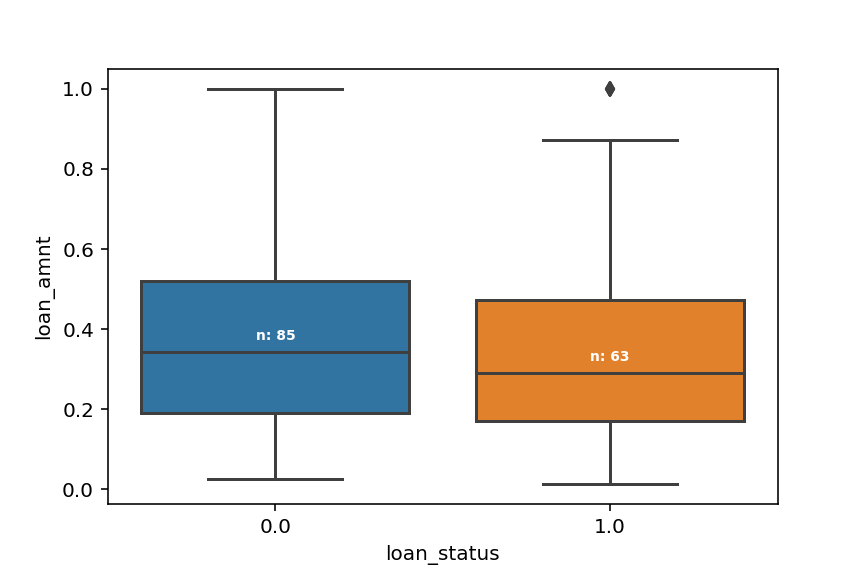

<Figure size 432x288 with 0 Axes>

In [83]:
panel.interact(numericPanel, var = numericListForPlot, showing = ['BoxPLot', "Group Density", "Density"])

#### Correlation Matrix
<a id= "correlationmatrix"></a>

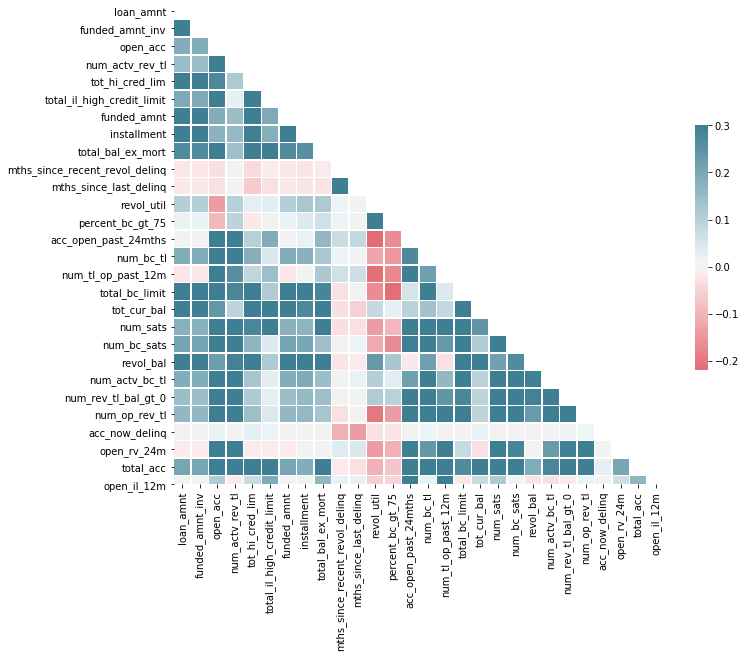

In [84]:
# Compute the correlation matrix
corr = numericVarsLassoFilteredForCorrelation.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

[Go to Table of Contents](#init)

# Modeling
<a id= "modeling"></a>

We are going to evaluate each model with the following score.

In [85]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

##  Train and Test Data Sets
<a id= "traintest"></a>


In [86]:
# create training and testing vars
predictiveVariables = lassoVariablesSelectedDataFrame.loc[:, lassoVariablesSelectedDataFrame.columns != 'loan_status']

random.seed( 30 )
X_train, X_test, y_train, y_test = train_test_split(predictiveVariables, loanStatusColumn, stratify=loanStatusColumn)
# show the distribution
print('y_train class distribution')
print(y_train.value_counts(normalize=True))
print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
1.0    0.766667
0.0    0.233333
Name: 1, dtype: float64
y_test class distribution
1.0    0.768
0.0    0.232
Name: 1, dtype: float64


[Go to Table of Contents](#init)

## Logistic Regression
<a id= "logisticregression"></a>

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function. The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1. We decide with a threshold value above which we classify values into Class 1 and of the value goes below the threshold then we classify it in Class 2. The threshold is set by optimizaing (minimizing) a score (cost function); which in our case are the three scores mentioned at the begining of this report.

<img src="../images/logistic.png" style="width: 600px">

In [87]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [88]:
lr = LogisticRegression(fit_intercept = False, C = 1e9)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Train's Scores

In [89]:
# fit a model
lr = LogisticRegression(fit_intercept = False, C = 1e9);
model = lr.fit(X_train, y_train);
predictionsTest = lr.predict(X_test);
predictionsTrain = lr.predict(X_train);



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [90]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0       50.0      125.0 
    Fully Paid       29.0      546.0 


              precision    recall  f1-score   support

         0.0       0.63      0.29      0.39       175
         1.0       0.81      0.95      0.88       575

    accuracy                           0.79       750
   macro avg       0.72      0.62      0.64       750
weighted avg       0.77      0.79      0.76       750



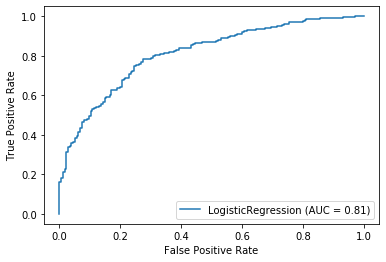

In [91]:
metrics.plot_roc_curve(lr, X_train, y_train)
plt.show()

In [92]:
# THRESHOLD = 0.9
# classified = list(map(lambda x: 1 if (x > THRESHOLD) else 0, list(lr.predict_proba(X_train)[:,1])))
# len(y_train), sum(classified == y_train)

In [93]:
# # create training and testing vars
# predictiveVariables = lassoVariablesSelectedDataFrame.loc[:, lassoVariablesSelectedDataFrame.columns != 'loan_status']

# random.seed( 30 )
# X_train, X_test, y_train, y_test = train_test_split(predictiveVariables, loanStatusColumn, test_size=0.2)
# print (X_train.shape, y_train.shape)
# print (X_test.shape, y_test.shape)

### Test's Scores

In [94]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsTest)) 

Confusion matrix:

                        0 Fully Paid 
             0       14.0       44.0 
    Fully Paid       17.0      175.0 


              precision    recall  f1-score   support

         0.0       0.45      0.24      0.31        58
         1.0       0.80      0.91      0.85       192

    accuracy                           0.76       250
   macro avg       0.63      0.58      0.58       250
weighted avg       0.72      0.76      0.73       250



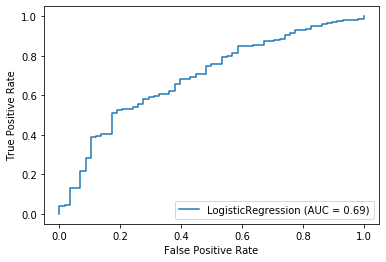

In [95]:
metrics.plot_roc_curve(lr, X_test, y_test)
plt.show()

### Feature Importance
<a id= "featureimportancerandomlogistic"></a>

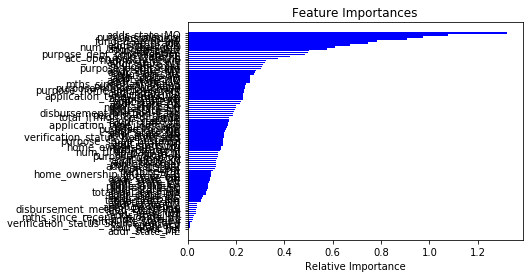

In [96]:
features = X_train.columns
#features = iris['feature_names']

importances = np.abs(np.array(np.std(X_train)) * model.coef_)
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices[0])), importances[0][indices[0]], color='b', align='center')
plt.yticks(range(len(indices[0])), [features[i] for i in indices[0]])
plt.xlabel('Relative Importance')
plt.show()

In [97]:
lista = []
for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0                          addr_state_MO
1                        purpose_medical
2                            installment
3                        funded_amnt_inv
4                              sub_grade
..                                   ...
96   verification_status_Source Verified
97                              open_acc
98                         addr_state_TX
99                             revol_bal
100                        addr_state_ME

[101 rows x 1 columns]

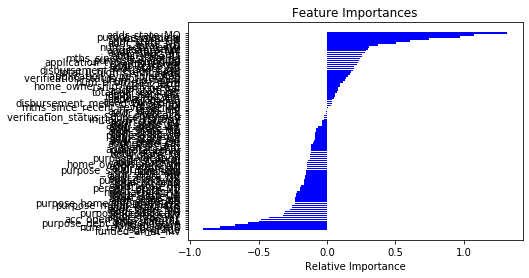

In [98]:
features = X_train.columns
#features = iris['feature_names']

importances = np.array(np.std(X_train)) * model.coef_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices[0])), importances[0][indices[0]], color='b', align='center')
plt.yticks(range(len(indices[0])), [features[i] for i in indices[0]])
plt.xlabel('Relative Importance')
plt.show()

#### Feature Importance for Fully Paid

In [99]:
lista = []
for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf.head(10)

Feature Importance
0      addr_state_MO
1    purpose_medical
2        installment
3      addr_state_OR
4      addr_state_NH
5          total_acc
6    num_actv_rev_tl
7          loan_amnt
8      addr_state_NM
9      addr_state_MT

#### Feature Importance for not paying at least one payment

In [100]:
featureImportancedf.head(10).iloc[::-1]

Feature Importance
9      addr_state_MT
8      addr_state_NM
7          loan_amnt
6    num_actv_rev_tl
5          total_acc
4      addr_state_NH
3      addr_state_OR
2        installment
1    purpose_medical
0      addr_state_MO

[Go to Table of Contents](#init)

## Support Vector Machine
<a id= "svm"></a>

The plan is to use different and more complex models each time in order to improve the prediction (i.e. the scores and results). 

The next model used is __Support Vector Machine__. SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

According to the SVM algorithm we find the points closest to the line from both classes. These points are called support vectors. We compute the distance between the line and the support vectors, this distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

<img src="../images/svm.png" style="width: 400px">


__KERNEL__
<a id= "kernel"></a>

In machine learning, a “kernel” is usually used to refer to the kernel trick, a method of __using a linear classifier to solve a non-linear problem__. It entails transforming linearly inseparable data to linearly separable ones. The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

<img src="../images/kernel.png" style="width: 600px">

### Linear Kernel
<a id= "linearkernel"></a>

In [101]:
clf = svm.SVC()
modelSvm = clf.fit(X_train, y_train)
predictionsSvm = clf.predict(X_test)

linear_svc = svm.SVC(kernel='linear')
linear_svc = linear_svc.fit(X_train, y_train)
linear_svc.kernel
predictionsSvmTest = linear_svc.predict(X_test)
predictionsSvmTrain = linear_svc.predict(X_train)

#### Train's Scores

In [102]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsSvmTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsSvmTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        7.0      168.0 
    Fully Paid        2.0      573.0 


              precision    recall  f1-score   support

         0.0       0.78      0.04      0.08       175
         1.0       0.77      1.00      0.87       575

    accuracy                           0.77       750
   macro avg       0.78      0.52      0.47       750
weighted avg       0.77      0.77      0.69       750



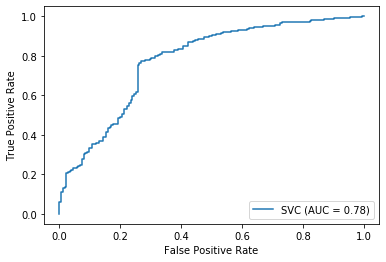

In [103]:
metrics.plot_roc_curve(linear_svc, X_train, y_train)
plt.show()

#### Test's Scores

In [104]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsSvmTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsSvmTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        1.0       57.0 
    Fully Paid        1.0      191.0 


              precision    recall  f1-score   support

         0.0       0.50      0.02      0.03        58
         1.0       0.77      0.99      0.87       192

    accuracy                           0.77       250
   macro avg       0.64      0.51      0.45       250
weighted avg       0.71      0.77      0.67       250



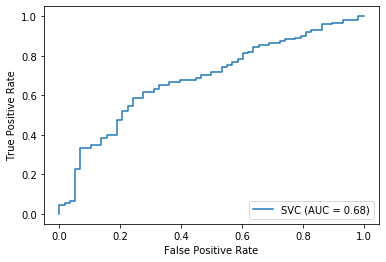

In [105]:
metrics.plot_roc_curve(linear_svc, X_test, y_test)
plt.show()

### Feature Importance
<a id= "featureimportancerandomSVM"></a>

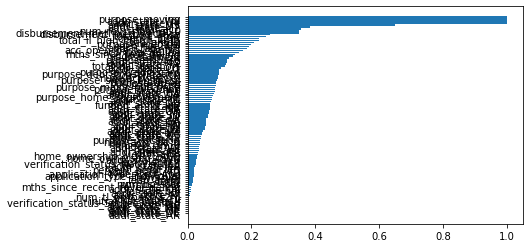

In [106]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = [X_train.columns]
f_importances(abs(linear_svc.coef_[0]), list(features_names[0]))

In [107]:
lista = []
importances = abs(linear_svc.coef_)
indices = np.argsort(importances)

for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0       purpose_moving
1        addr_state_RI
2        addr_state_WY
3        addr_state_MS
4        addr_state_MT
..                 ...
96       addr_state_ME
97       addr_state_MN
98       addr_state_NE
99       addr_state_DC
100      addr_state_AR

[101 rows x 1 columns]

### Polynomial Kernel
<a id= "polykernel"></a>

In [108]:
linearPoly = svm.SVC(kernel='poly', degree = 4)
linearPoly.kernel
modelSvm = linearPoly.fit(X_train, y_train)
predictionsPolyTest = linearPoly.predict(X_test)
predictionsPolyTrain = linearPoly.predict(X_train)


#### Train's Scores

In [109]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsPolyTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsPolyTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0       84.0       91.0 
    Fully Paid        1.0      574.0 


              precision    recall  f1-score   support

         0.0       0.99      0.48      0.65       175
         1.0       0.86      1.00      0.93       575

    accuracy                           0.88       750
   macro avg       0.93      0.74      0.79       750
weighted avg       0.89      0.88      0.86       750



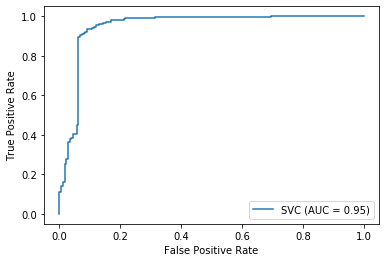

In [110]:
metrics.plot_roc_curve(linearPoly, X_train, y_train)
plt.show()

#### Test's Scores

In [111]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsPolyTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsPolyTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        9.0       49.0 
    Fully Paid        7.0      185.0 


              precision    recall  f1-score   support

         0.0       0.56      0.16      0.24        58
         1.0       0.79      0.96      0.87       192

    accuracy                           0.78       250
   macro avg       0.68      0.56      0.56       250
weighted avg       0.74      0.78      0.72       250



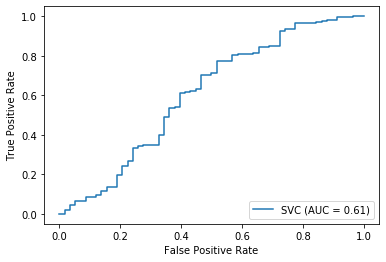

In [112]:
metrics.plot_roc_curve(linearPoly, X_test, y_test)
plt.show()

### Radial Basis Function Kernel
<a id= "rbfkernel"></a>

In [113]:
linearRbf = svm.SVC(kernel='rbf')
linearRbf.kernel
modelSvm = linearRbf.fit(X_train, y_train)
predictionsRbvTest = linearRbf.predict(X_test)
predictionsRbvTrain = linearRbf.predict(X_train)

#### Train's Scores

In [114]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRbvTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsRbvTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        2.0      173.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02       175
         1.0       0.77      1.00      0.87       575

    accuracy                           0.77       750
   macro avg       0.88      0.51      0.45       750
weighted avg       0.82      0.77      0.67       750



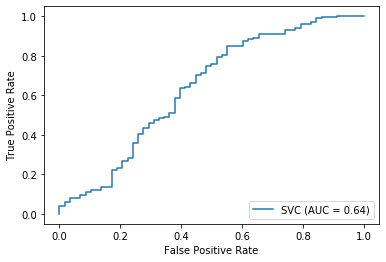

In [115]:
metrics.plot_roc_curve(linearRbf, X_test, y_test)
plt.show()

#### Test's Scores

In [116]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRbvTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsRbvTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        0.0       58.0 
    Fully Paid        0.0      192.0 


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.77      1.00      0.87       192

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


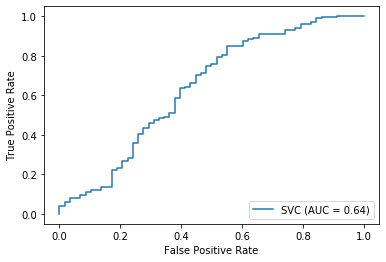

In [117]:
metrics.plot_roc_curve(linearRbf, X_test, y_test)
plt.show()

### Sigmoid Kernel
<a id= "sigmoidkernel"></a>

In [118]:
linearSigmoid = svm.SVC(kernel='sigmoid')
linearSigmoid.kernel
modelSvm = linearSigmoid.fit(X_train, y_train)
predictionsSigmoidTest = linearSigmoid.predict(X_test)
predictionsSigmoidTrain = linearSigmoid.predict(X_train)

##### Train's Scores

In [119]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsSigmoidTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsSigmoidTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        3.0      172.0 
    Fully Paid       15.0      560.0 


              precision    recall  f1-score   support

         0.0       0.17      0.02      0.03       175
         1.0       0.77      0.97      0.86       575

    accuracy                           0.75       750
   macro avg       0.47      0.50      0.44       750
weighted avg       0.63      0.75      0.66       750



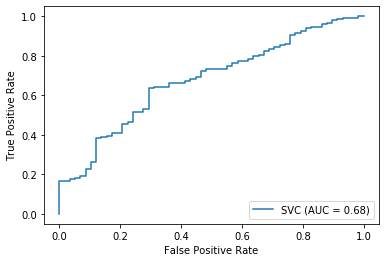

In [120]:
metrics.plot_roc_curve(linearSigmoid, X_test, y_test)
plt.show()

##### Test's Scores

In [121]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsSigmoidTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsSigmoidTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        4.0       54.0 
    Fully Paid        3.0      189.0 


              precision    recall  f1-score   support

         0.0       0.57      0.07      0.12        58
         1.0       0.78      0.98      0.87       192

    accuracy                           0.77       250
   macro avg       0.67      0.53      0.50       250
weighted avg       0.73      0.77      0.70       250



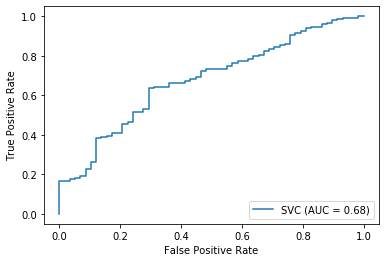

In [122]:
metrics.plot_roc_curve(linearSigmoid, X_test, y_test)
plt.show()

### Radial Basis Function Kernel
<a id= "rbfkernel"></a>

In [123]:
linearRbf = svm.SVC(kernel='rbf')
linearRbf.kernel
modelSvm = linearRbf.fit(X_train, y_train)
predictionsRbvTest = linearRbf.predict(X_test)
predictionsRbvTrain = linearRbf.predict(X_train)

#### Train's Scores

In [124]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRbvTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsRbvTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        2.0      173.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02       175
         1.0       0.77      1.00      0.87       575

    accuracy                           0.77       750
   macro avg       0.88      0.51      0.45       750
weighted avg       0.82      0.77      0.67       750



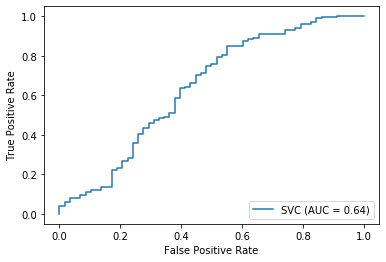

In [125]:
metrics.plot_roc_curve(linearRbf, X_test, y_test)
plt.show()

#### Test's Scores

In [126]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRbvTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsRbvTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        0.0       58.0 
    Fully Paid        0.0      192.0 


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.77      1.00      0.87       192

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


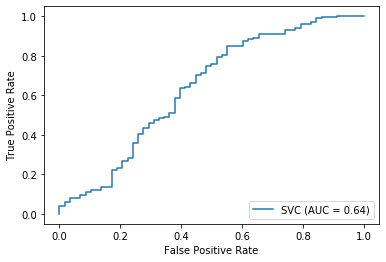

In [127]:
metrics.plot_roc_curve(linearRbf, X_test, y_test)
plt.show()

[Go to Table of Contents](#init)

## Grid Search
<a id= "gridsearch"></a>

### Grid Search Linear Kernel
<a id= "gridsearchslinearsvm"></a>

Find hyperparameters optimizing a score:

In [128]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'kernel': ['linear']};

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3); 

# fitting the model for grid search 
grid.fit(X_train, y_train); 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.767, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.767, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.767, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.767, total=   0.0s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.767, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.740, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.767, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.733, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.747, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.767, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.740, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   19.3s finished


In [129]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Go to Table of Contents](#init)

#### Best model after Grid Search

In [130]:
linear_svc = svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
linear_svc = linear_svc.fit(X_train, y_train)
linear_svc.kernel
predictionsSvmTest = linear_svc.predict(X_test)
predictionsSvmTrain = linear_svc.predict(X_train)

##### Train's Scores

In [131]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsSvmTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsSvmTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        0.0      175.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       175
         1.0       0.77      1.00      0.87       575

    accuracy                           0.77       750
   macro avg       0.38      0.50      0.43       750
weighted avg       0.59      0.77      0.67       750



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


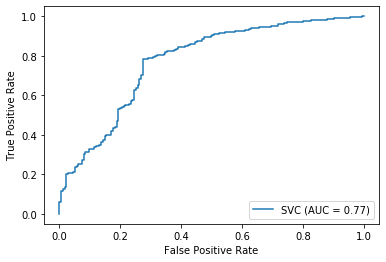

In [132]:
metrics.plot_roc_curve(linear_svc, X_train, y_train)
plt.show()

##### Test's Scores

In [133]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsSvmTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsSvmTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        0.0       58.0 
    Fully Paid        0.0      192.0 


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        58
         1.0       0.77      1.00      0.87       192

    accuracy                           0.77       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.59      0.77      0.67       250



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


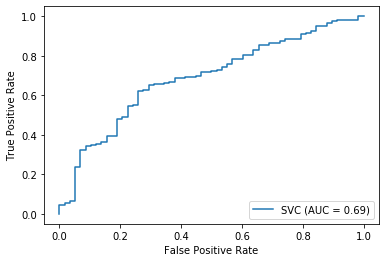

In [134]:
metrics.plot_roc_curve(linear_svc, X_test, y_test)
plt.show()

#### Feature Importance
<a id= "featureimportancelinear"></a>





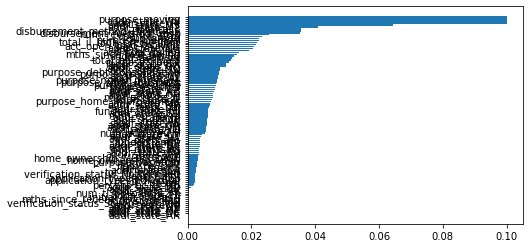

In [135]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = [X_train.columns]
f_importances(abs(linear_svc.coef_[0]), list(features_names[0]))

In [136]:
lista = []
importances = abs(linear_svc.coef_)
indices = np.argsort(importances)

for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0        addr_state_RI
1        addr_state_MS
2       purpose_moving
3        addr_state_WY
4        addr_state_MT
..                 ...
96       addr_state_ME
97       addr_state_NE
98       addr_state_AR
99       addr_state_DE
100      addr_state_DC

[101 rows x 1 columns]

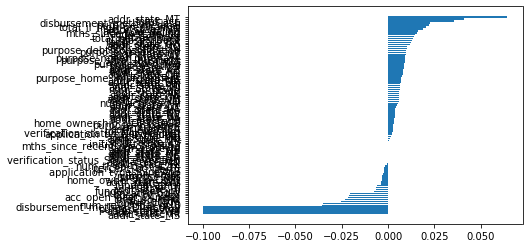

In [137]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = [X_train.columns]
f_importances(linear_svc.coef_[0], list(features_names[0]))

##### Feature Importance for Fully Paid

In [138]:
lista = []
importances = linear_svc.coef_
indices = np.argsort(importances)

for i in indices[0]:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf.head(10)

Feature Importance
0               addr_state_MT
1                   total_acc
2    disbursement_method_Cash
3             purpose_medical
4  total_il_high_credit_limit
5               addr_state_NH
6              acc_now_delinq
7      mths_since_last_delinq
8               addr_state_SC
9                 installment

##### Feature Importance for not paying at least one payment


In [139]:
featureImportancedf.tail(10).iloc[::-1]

Feature Importance
100                 purpose_moving
99                   addr_state_WY
98                   addr_state_MS
97                   addr_state_RI
96   disbursement_method_DirectPay
95             num_rev_tl_bal_gt_0
94                     open_il_12m
93                       sub_grade
92                  total_bc_limit
91            acc_open_past_24mths

### Grid Search Poly Kernel
<a id= "gridsearchskernelsvm"></a>

In [140]:


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'degree': [2,3,4,5,6,7,8,9,10],
'kernel': ['poly']}; 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3); 

# fitting the model for grid search 
grid.fit(X_train, y_train); 



Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.780, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.787, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.747, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.727, total=   0.0s
[CV] C=0.1, degree=2, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, degree=2, gamma=1, kernel=poly, score=0.773, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=2, gamma=0.1, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=poly, score=0.767, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ...........

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed:   40.3s finished


In [141]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 



{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Go to Table of Contents](#init)

#### Best model after Grid Search

In [142]:
linearPoly = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
linearPoly.kernel
modelSvm = linearPoly.fit(X_train, y_train)
predictionsPolyTest = linearPoly.predict(X_test)
predictionsPolyTrain = linearPoly.predict(X_train)


##### Train's Scores

In [143]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsPolyTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsPolyTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        6.0      169.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       1.00      0.03      0.07       175
         1.0       0.77      1.00      0.87       575

    accuracy                           0.77       750
   macro avg       0.89      0.52      0.47       750
weighted avg       0.83      0.77      0.68       750



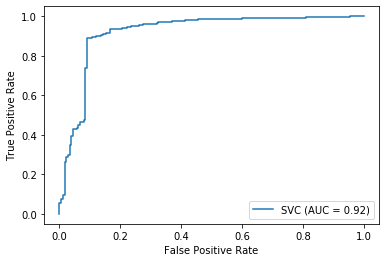

In [144]:
metrics.plot_roc_curve(linearPoly, X_train, y_train)
plt.show()

##### Test's Scores

In [145]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsPolyTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsPolyTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        1.0       57.0 
    Fully Paid        0.0      192.0 


              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        58
         1.0       0.77      1.00      0.87       192

    accuracy                           0.77       250
   macro avg       0.89      0.51      0.45       250
weighted avg       0.82      0.77      0.68       250



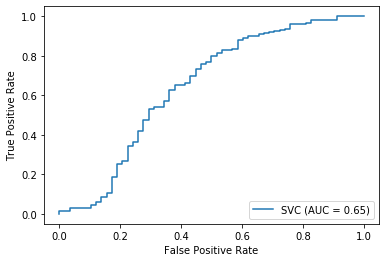

In [146]:
metrics.plot_roc_curve(linearPoly, X_test, y_test)
plt.show()

### Grid Search Radial Basis Function Kernel
<a id= "gridsearchsrbfsvm"></a>

In [147]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
'kernel': ['rbf']}; 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3); 

# fitting the model for grid search 
grid.fit(X_train, y_train); 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.9s finished


In [148]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[Go to Table of Contents](#init)

#### Best model after Grid Search

In [149]:
linearRbf = svm.SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
linearRbf.kernel
modelSvm = linearRbf.fit(X_train, y_train)
predictionsRbvTest = linearRbf.predict(X_test)
predictionsRbvTrain = linearRbf.predict(X_train)

##### Train's Scores

In [150]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRbvTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsRbvTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0       22.0      153.0 
    Fully Paid        2.0      573.0 


              precision    recall  f1-score   support

         0.0       0.92      0.13      0.22       175
         1.0       0.79      1.00      0.88       575

    accuracy                           0.79       750
   macro avg       0.85      0.56      0.55       750
weighted avg       0.82      0.79      0.73       750



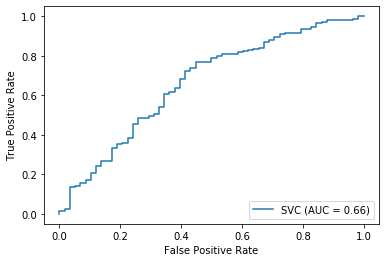

In [151]:
metrics.plot_roc_curve(linearRbf, X_test, y_test)
plt.show()

##### Test's Scores

In [152]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRbvTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsRbvTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        4.0       54.0 
    Fully Paid        4.0      188.0 


              precision    recall  f1-score   support

         0.0       0.50      0.07      0.12        58
         1.0       0.78      0.98      0.87       192

    accuracy                           0.77       250
   macro avg       0.64      0.52      0.49       250
weighted avg       0.71      0.77      0.69       250



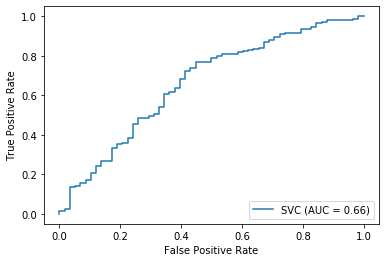

In [153]:
metrics.plot_roc_curve(linearRbf, X_test, y_test)
plt.show()

### Grid Search Sigmoid Kernel
<a id= "gridsearchsigmoidsvm"></a>

In [154]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['sigmoid']}; 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3); 

# fitting the model for grid search 
grid.fit(X_train, y_train); 



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.5s finished


In [155]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 



{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Go to Table of Contents](#init)

#### Best model after Grid Search

In [156]:
linearSigmoid = svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
linearSigmoid.kernel
modelSvm = linearSigmoid.fit(X_train, y_train)
predictionsSigmoidTest = linearSigmoid.predict(X_test)
predictionsSigmoidTrain = linearSigmoid.predict(X_train)

##### Train's Scores

In [157]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsSigmoidTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsSigmoidTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0        0.0      175.0 
    Fully Paid        3.0      572.0 


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       175
         1.0       0.77      0.99      0.87       575

    accuracy                           0.76       750
   macro avg       0.38      0.50      0.43       750
weighted avg       0.59      0.76      0.66       750



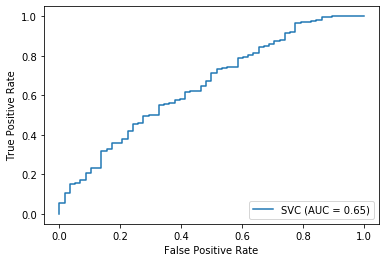

In [158]:
metrics.plot_roc_curve(linearSigmoid, X_test, y_test)
plt.show()

##### Test's Scores

In [159]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsSigmoidTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsSigmoidTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        1.0       57.0 
    Fully Paid        0.0      192.0 


              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        58
         1.0       0.77      1.00      0.87       192

    accuracy                           0.77       250
   macro avg       0.89      0.51      0.45       250
weighted avg       0.82      0.77      0.68       250



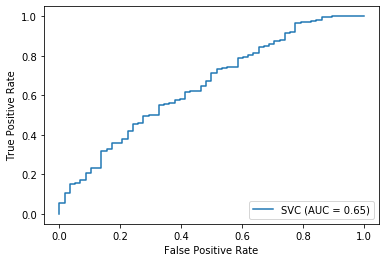

In [160]:
metrics.plot_roc_curve(linearSigmoid, X_test, y_test)
plt.show()

[Go to Table of Contents](#init)

## Random Forest
<a id= "randomforest"></a>

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.


<img src="../images/randomforest.png" style="width: 400px">

- Bootstrap Aggregation (or Bagging for short), is a simple and very powerful __ensemble method__.
An ensemble method is a technique that __combines the predictions from multiple machine learning algorithms together__ to make more accurate predictions than any individual model.

- Bootstrap Aggregation is a general procedure that can be used to __reduce the variance for those algorithm that have high variance__. An algorithm that has high variance are __decision trees__, like classification and regression trees.
Decision trees are __sensitive to the specific data on which they are trained__. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the __predictions can be quite different__.

    - Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees. Bagging uses random samples, independent from each other, where observations have the same probability of being selected.


In [161]:
randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)
# print(randomForestModel.feature_importances_)
predictionsRandomForestTest = randomForestModel.predict(X_test)
predictionsRandomForestTrain = randomForestModel.predict(X_train)

### Train's Scores

In [162]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRandomForestTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsRandomForestTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0      175.0        0.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       175
         1.0       1.00      1.00      1.00       575

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



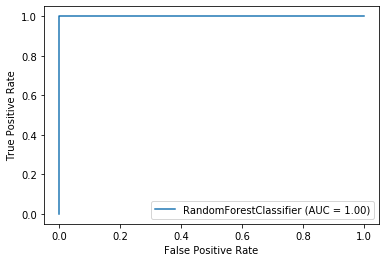

In [163]:
metrics.plot_roc_curve(randomForestModel, X_train, y_train)
plt.show()

### Test's Scores

In [164]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRandomForestTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsRandomForestTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        3.0       55.0 
    Fully Paid        4.0      188.0 


              precision    recall  f1-score   support

         0.0       0.43      0.05      0.09        58
         1.0       0.77      0.98      0.86       192

    accuracy                           0.76       250
   macro avg       0.60      0.52      0.48       250
weighted avg       0.69      0.76      0.69       250



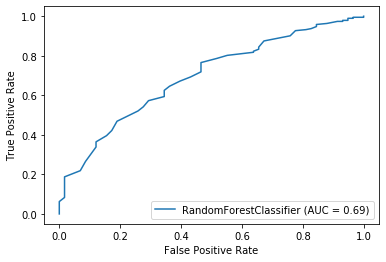

In [165]:
metrics.plot_roc_curve(randomForestModel, X_test, y_test)
plt.show()

### Feature Importance
<a id= "featureimportancerandomforest"></a>

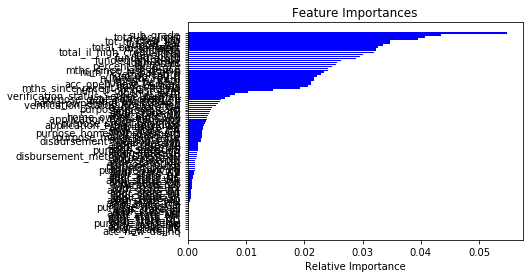

In [166]:
features = X_train.columns
#features = iris['feature_names']

importances = randomForestModel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [167]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0            sub_grade
1       total_bc_limit
2           revol_util
3      tot_hi_cred_lim
4          tot_cur_bal
..                 ...
96     purpose_wedding
97       addr_state_OR
98       addr_state_ME
99       addr_state_AK
100     acc_now_delinq

[101 rows x 1 columns]

### Grid Search Random Forest
<a id= "gridsearchrandomforest"></a>

In [168]:
# defining parameter range 
param_grid = {'min_samples_split': [3, 5, 10],
              'n_estimators' : [100, 300],
              'max_depth': [3, 5, 15, 25],
              'max_features': [3, 5, 10, 20]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train); 




Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=300, score=0.767, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=300, score=0.767, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=300, score=0.767, total=   0.4s
[CV] max_depth=3, max_features=3, min_samples_split=3, n_estimators=300 
[CV]  max_depth=3, max_features=3, min_samples_split=3, n_estimators=300, score=0.767, total=   0.4s
[CV] max_depth=3, max_feature

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  2.8min finished


In [169]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'max_depth': 15, 'max_features': 20, 'min_samples_split': 10, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Go to Table of Contents](#init)

#### Best model after Grid Search

In [170]:
randomForestModel = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
randomForestModel.fit(X_train, y_train)
# print(randomForestModel.feature_importances_)
predictionsRandomForestTest = randomForestModel.predict(X_test)
predictionsRandomForestTrain = randomForestModel.predict(X_train)

##### Train's Scores

In [171]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsRandomForestTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsRandomForestTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0      170.0        5.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       175
         1.0       0.99      1.00      1.00       575

    accuracy                           0.99       750
   macro avg       1.00      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



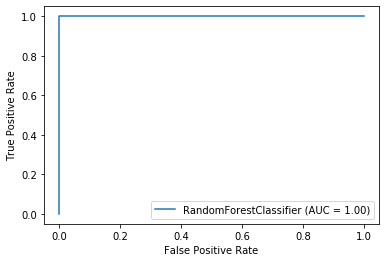

In [172]:
metrics.plot_roc_curve(randomForestModel, X_train, y_train)
plt.show()

##### Test's Scores

In [173]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsRandomForestTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsRandomForestTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        4.0       54.0 
    Fully Paid        3.0      189.0 


              precision    recall  f1-score   support

         0.0       0.57      0.07      0.12        58
         1.0       0.78      0.98      0.87       192

    accuracy                           0.77       250
   macro avg       0.67      0.53      0.50       250
weighted avg       0.73      0.77      0.70       250



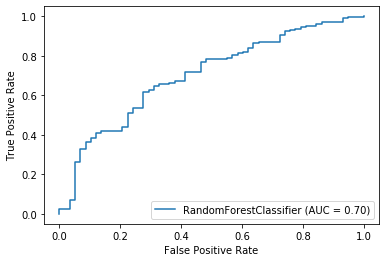

In [174]:
metrics.plot_roc_curve(randomForestModel, X_test, y_test)
plt.show()

##### Feature Importance
<a id= "featureimportancerandomforesttgrid"></a>

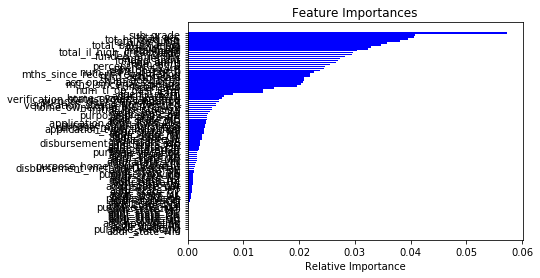

In [175]:
features = X_train.columns


importances = randomForestModel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [176]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0            sub_grade
1            total_acc
2      tot_hi_cred_lim
3       total_bc_limit
4            revol_bal
..                 ...
96      acc_now_delinq
97       addr_state_AK
98       addr_state_ID
99     purpose_wedding
100      addr_state_NM

[101 rows x 1 columns]

In [177]:

dotfile = six.StringIO()
i_tree = 0
for randomForestModel in randomForestModel.estimators_:
    export_graphviz(randomForestModel,out_file='tree.dot',
    feature_names=features,
    filled=True,
    rounded=True)
    
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

In [178]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

[Go to Table of Contents](#init)

## XGBoost
<a id= "xgboost"></a>

XGBoost stands for “Extreme Gradient Boosting”.

XGBoost is used for __supervised learning problems__, where we use the training data (with multiple features) x's to predict a target variable y.

- Boost: not all data have the same probability of being selected. The __cases in which it is wrong__ assigns them a __greater probability of being selected in the following sample__ to try to correct the error. This presents an overfit problem. The samples are dependent (sequential). When composing uses a weighted average.

In [179]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [180]:
# make predictions for test data
y_predTest = model.predict(X_test)
predictionsTest = [round(value) for value in y_predTest]

# make predictions for test data
y_predTrain = model.predict(X_train)
predictionsTrain = [round(value) for value in y_predTrain]

### Train's Scores

In [181]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0      112.0       63.0 
    Fully Paid        1.0      574.0 


              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78       175
         1.0       0.90      1.00      0.95       575

    accuracy                           0.91       750
   macro avg       0.95      0.82      0.86       750
weighted avg       0.92      0.91      0.91       750



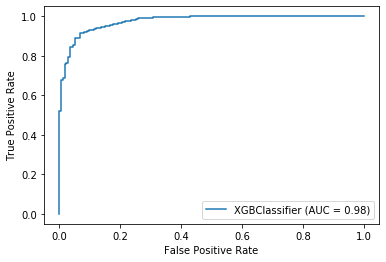

In [182]:
metrics.plot_roc_curve(model, X_train, y_train)
plt.show()

### Test's Scores

In [183]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsTest)) 

Confusion matrix:

                        0 Fully Paid 
             0        7.0       51.0 
    Fully Paid       11.0      181.0 


              precision    recall  f1-score   support

         0.0       0.39      0.12      0.18        58
         1.0       0.78      0.94      0.85       192

    accuracy                           0.75       250
   macro avg       0.58      0.53      0.52       250
weighted avg       0.69      0.75      0.70       250



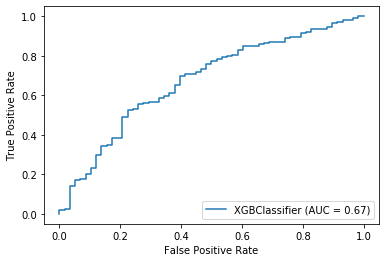

In [184]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

### Feature Importance
<a id= "featureimportancexgboost"></a>

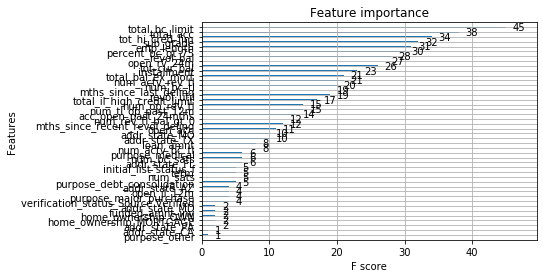

In [185]:
xgb.plot_importance(model);

In [186]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0            sub_grade
1            total_acc
2      tot_hi_cred_lim
3       total_bc_limit
4            revol_bal
..                 ...
96      acc_now_delinq
97       addr_state_AK
98       addr_state_ID
99     purpose_wedding
100      addr_state_NM

[101 rows x 1 columns]

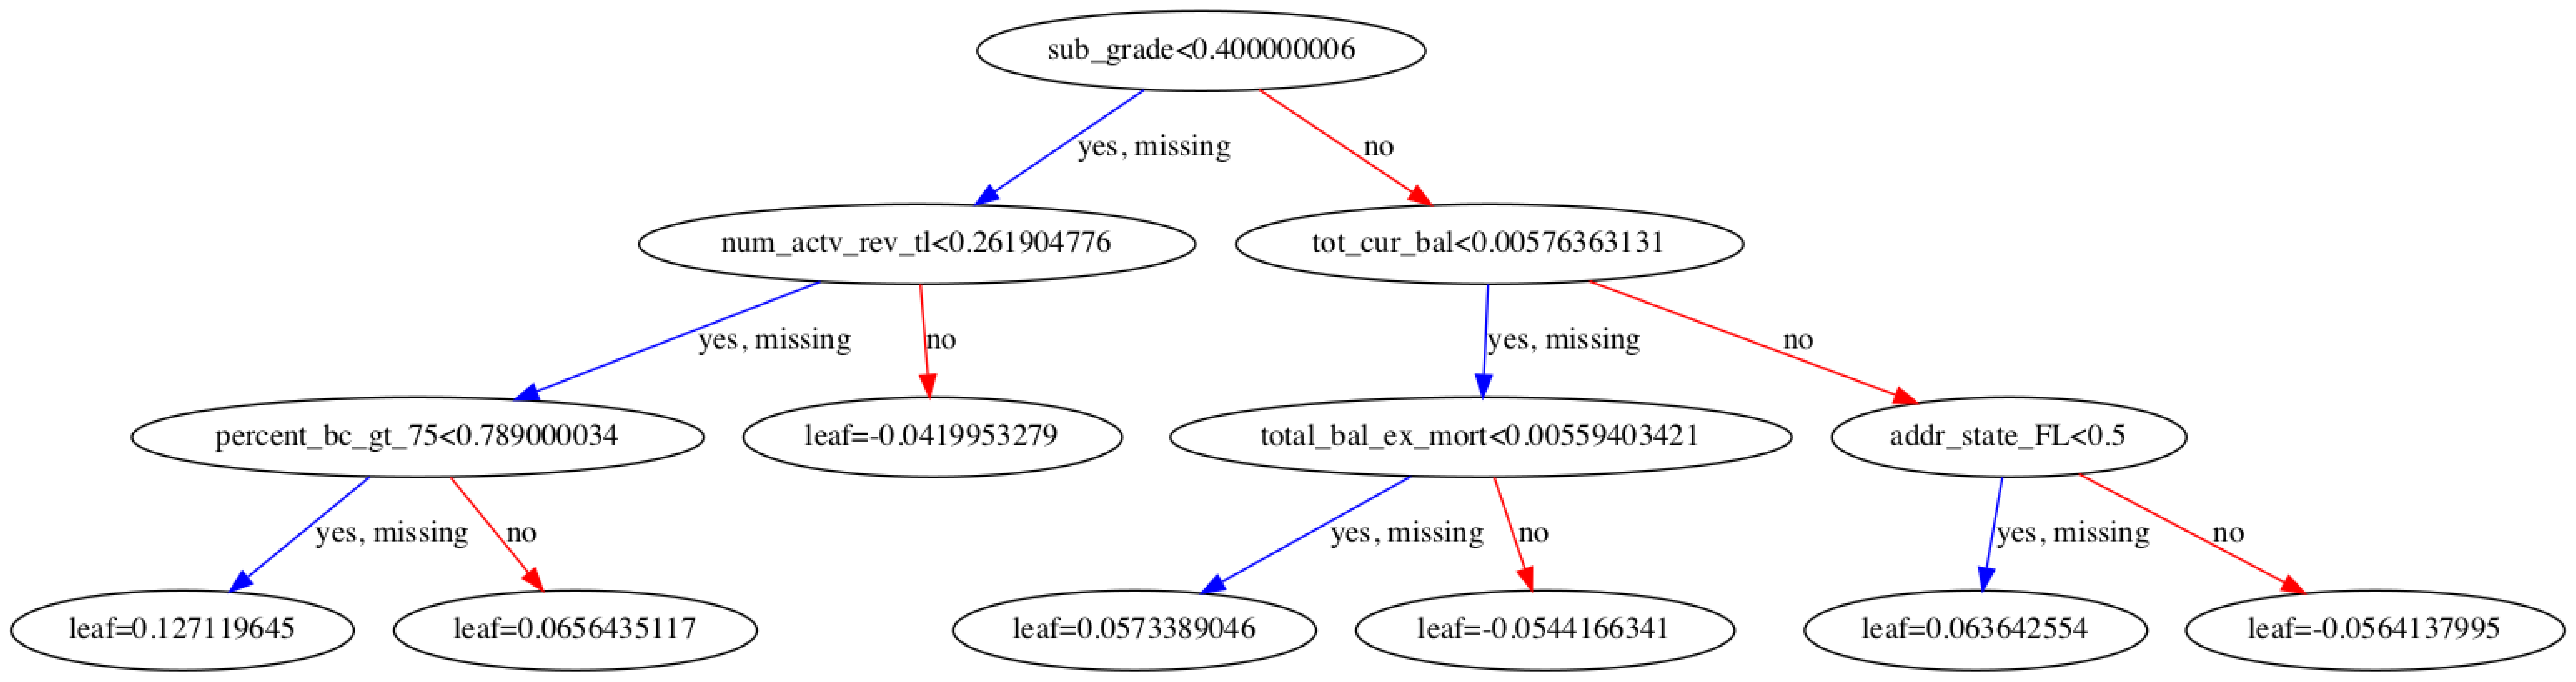

In [187]:
xgb.plot_tree(model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree2.png')
#xgb.to_graphviz(model, num_trees=2)

### Grid Search XGBoost
<a id= "gridsearchsxgboost"></a>

In [190]:
# 'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
            
    
    

param_test1 = {
 'max_depth':range(0,11),
 'min_child_weight':range(0,11),
 'gamma': range(0,5),
 'max_delta_step': range(0,11,1)

}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)


In [191]:
gsearch1.best_params_, gsearch1.best_score_

[Go to Table of Contents](#init)

#### Best model after Grid Search

In [192]:
# fit model no training data
model = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [193]:
# make predictions for test data
y_predTest = model.predict(X_test)
predictionsTest = [round(value) for value in y_predTest]

# make predictions for test data
y_predTrain = model.predict(X_train)
predictionsTrain = [round(value) for value in y_predTrain]

##### Train's Scores

In [194]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_train, predictionsTrain)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_train, predictionsTrain)) 

Confusion matrix:

                        0 Fully Paid 
             0      136.0       39.0 
    Fully Paid        0.0      575.0 


              precision    recall  f1-score   support

         0.0       1.00      0.78      0.87       175
         1.0       0.94      1.00      0.97       575

    accuracy                           0.95       750
   macro avg       0.97      0.89      0.92       750
weighted avg       0.95      0.95      0.95       750



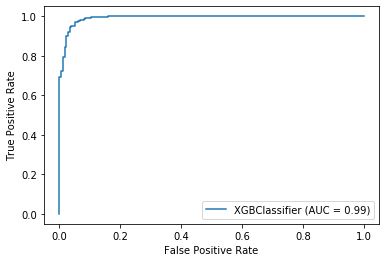

In [195]:
metrics.plot_roc_curve(model, X_train, y_train)
plt.show()

##### Test's Scores

In [196]:
print("Confusion matrix:\n")
cm =confusion_matrix(y_test, predictionsTest)
print_cm(cm, ["0","Fully Paid"], hide_zeroes=False, hide_diagonal=False, hide_threshold=None)
print("\n")
print(classification_report(y_test, predictionsTest)) 

Confusion matrix:

                        0 Fully Paid 
             0       11.0       47.0 
    Fully Paid       12.0      180.0 


              precision    recall  f1-score   support

         0.0       0.48      0.19      0.27        58
         1.0       0.79      0.94      0.86       192

    accuracy                           0.76       250
   macro avg       0.64      0.56      0.57       250
weighted avg       0.72      0.76      0.72       250



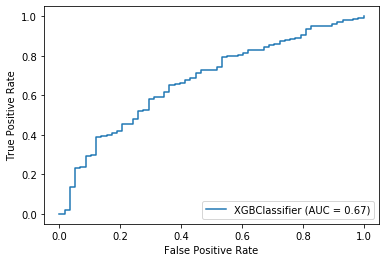

In [197]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

##### Feature Importance
<a id= "featureimportancexgboostgrid"></a>

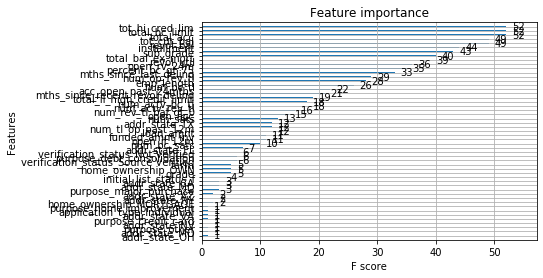

In [198]:
xgb.plot_importance(model);

In [199]:
lista = []
for i in indices:
    lista.append(features[i])

featureImportancedf = pd.DataFrame( lista[::-1])
featureImportancedf.columns = ['Feature Importance']
featureImportancedf

Feature Importance
0            sub_grade
1            total_acc
2      tot_hi_cred_lim
3       total_bc_limit
4            revol_bal
..                 ...
96      acc_now_delinq
97       addr_state_AK
98       addr_state_ID
99     purpose_wedding
100      addr_state_NM

[101 rows x 1 columns]

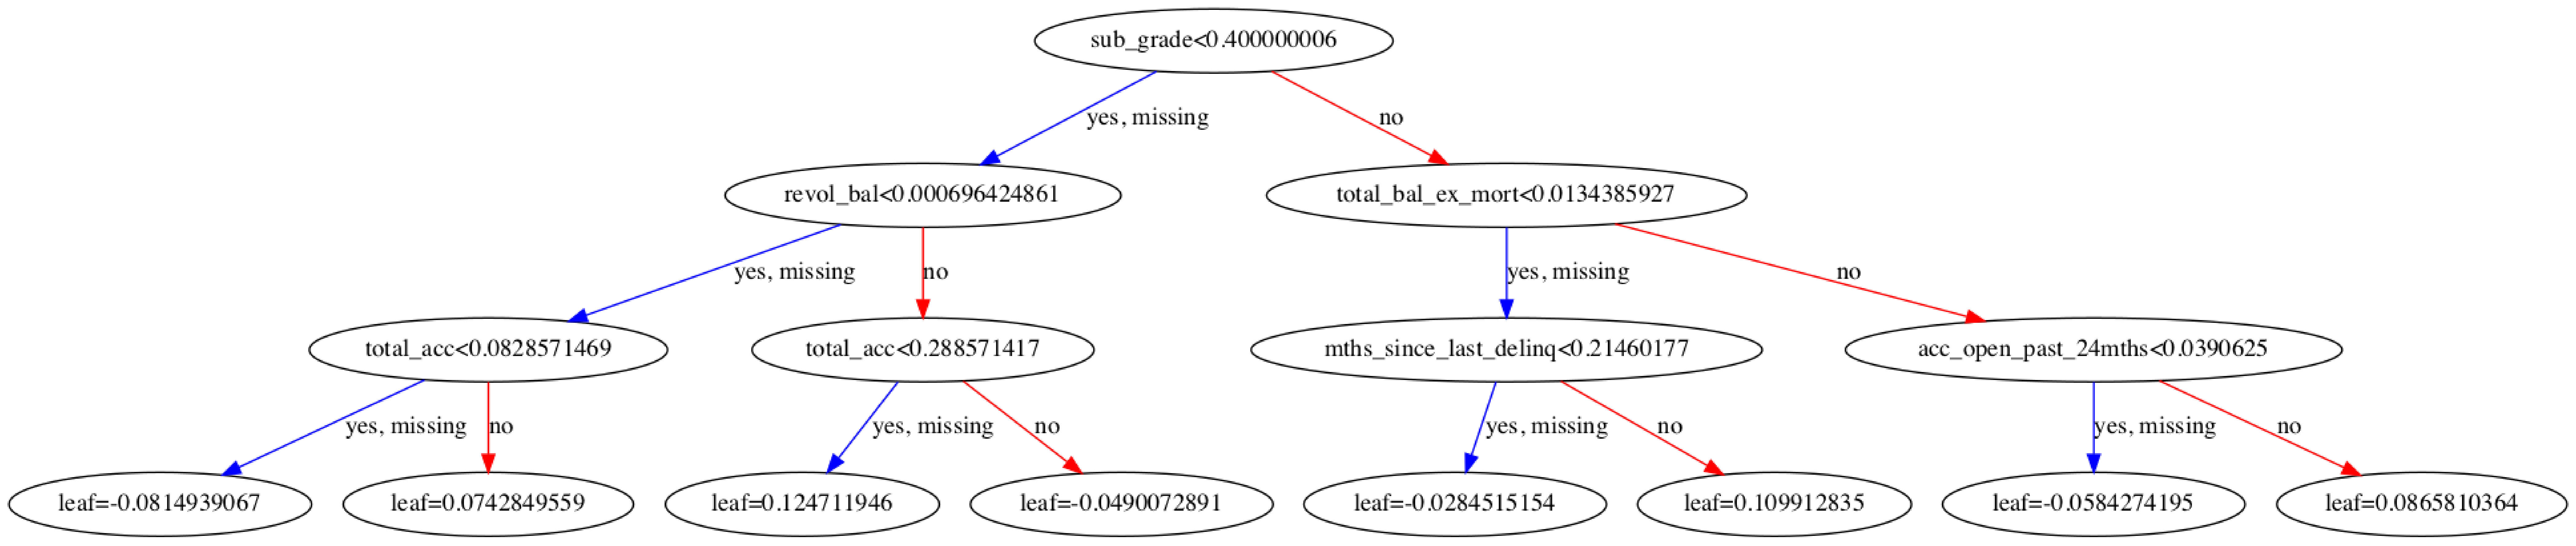

In [200]:
xgb.plot_tree(model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree2.png')

[Go to Table of Contents](#init)

# Conclusions
<a id= "conclusions"></a>


Based on the proposed scores, the best model to predict the test set was the Support Vector Machine with Radial Basis Function Kernel. Looking at the feature importance for the models, every model had different features as the main characteristics to decide the classification, but some interesting conclusions arose from this initial approach.


| Feature Importance | XGBOOST                    | Random Forest              | SVM Linear Kernel          | Logistic Regression        |
|--------------------|----------------------------|----------------------------|----------------------------|----------------------------|
| 1                  | sub_grade                  | sub_grade                  | purpose_small_business     | purpose_debt_consolidation |
| 2                  | total_bc_limit             | revol_util                 | addr_state_DC              | purpose_credit_card        |
| 3                  | tot_cur_bal                | tot_hi_cred_lim            | addr_state_DE              | purpose_car                |
| 4                  | tot_hi_cred_lim            | tot_cur_bal                | purpose_car                | purpose_home_improvement   |
| 5                  | revol_util                 | total_bal_ex_mort          | purpose_wedding            | installment                |
| 6                  | total_bal_ex_mort          | installment                | purpose_other              | purpose_other              |
| 7                  | installment                | total_acc                  | purpose_house              | initial_list_status_f      |
| 8                  | revol_bal                  | total_bc_limit             | purpose_credit_card        | initial_list_status_w      |
| 9                  | total_acc                  | total_il_high_credit_limit | purpose_debt_consolidation | addr_state_NV              |
| 10                 | total_il_high_credit_limit | revol_bal                  | purpose_major_purchase     | addr_state_HI              |



XGBOOST and Random Forest models selected a group of features as the most important; `sub_grade`, `tot_hi_cred_lim`, `total_acc`, `revol_util`, among other. Every feature for these models is related somehow to the rest of the features; happening in both models. On the other hand, the SVM Linear Kernel and the Logistic Regression (both linear) selected a group of features as the most important as well; `purpose` and `addr_state` in different categories. The only variable shared by the groups is `installment`. Apparently, there are two approaches for this classification problem: a linear approach and a non-linear; only by looking at the features each model selects.

[Go to Table of Contents](#init)

# References
<a id= "references"></a>

https://www.kaggle.com/wendykan/lending-club-loan-data

https://en.wikipedia.org/wiki/Precision_and_recall

https://stats.stackexchange.com/questions/367155/why-lasso-for-feature-selection

https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

https://towardsdatascience.com/kernel-function-6f1d2be6091

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://help.bitbond.com/article/20-the-10-loan-status-variants-explained

https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/svm.html

https://xgboost.readthedocs.io/en/latest/

https://xgboost.readthedocs.io/en/latest/parameter.html